In [4]:
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay  # Importar Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotl.
import requests # Import requests library to make HTTP requests in Python easily.
import pandas as pd
from scipy.spatial.distance import pdist, squareform 
from sklearn.decomposition import PCA
from scipy.spatial import KDTree

In [5]:
import os
import requests
import csv
#Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/ad_Car/"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'X', 'Y',  'Tipo']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Mostrar las primeras filas del DataFrame
    print("Contenido de", archivo_csv)
    print(df.head(5))
    
    # Contar el número de IDs distintos
    num_ids_distintos = df['id'].nunique()
    print("Número de IDs distintos:", num_ids_distintos)

# Obtener una lista de fenotipos únicos
    fenotipos_unicos = df['Tipo'].unique().tolist()
    print("Fenotipos únicos:", fenotipos_unicos)

Contenido de topology_ad_carcinoma_2_clean.csv
       id                   X                   Y                Tipo
0  CellID          X_centroid          Y_centroid           phenotype
1    8999  20768.070521861777  11650.833568406206  Ki67+ tumor cells 
2    9344   19005.00342465753   11177.70890410959       stromal cells
3   17656  19197.455301455306   11807.69022869023       stromal cells
4   23136   19063.15503875969   11416.31007751938       stromal cells
Número de IDs distintos: 2481
Fenotipos únicos: ['phenotype', 'Ki67+ tumor cells ', 'stromal cells', 'NK', 'dendritic cells', 'M2 macrophages', 'memory CD8+ T cells', 'regulatory T cells', 'effector CD8+ T cells', 'Unknown', 'memory CD4+ T cells', 'M1/M0 macrophages', 'other APCs', 'tumor cells', 'B cells', 'neutrophils', 'CD4+ T cells']
Contenido de topology_ad_carcinoma_10_clean.csv
       id                   X                   Y                Tipo
0  CellID          X_centroid          Y_centroid           phenotype
1    

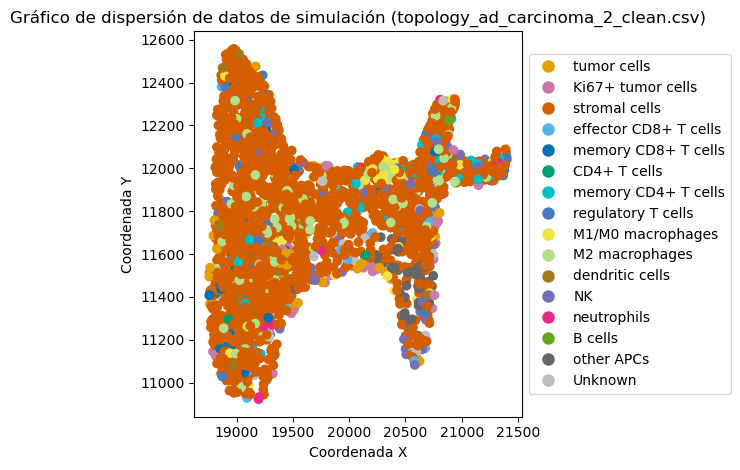

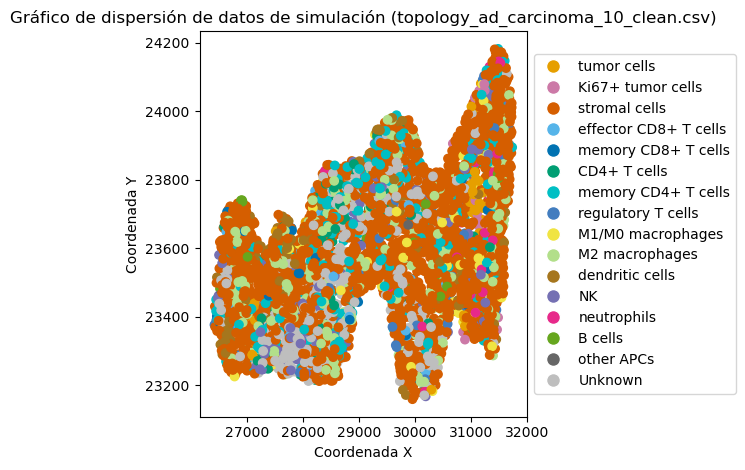

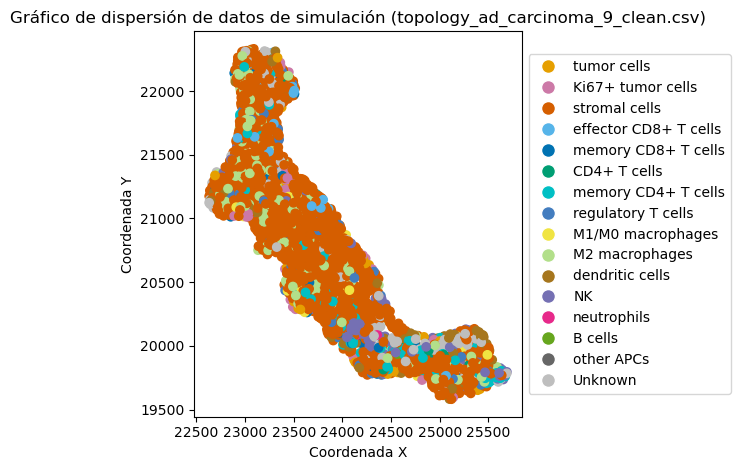

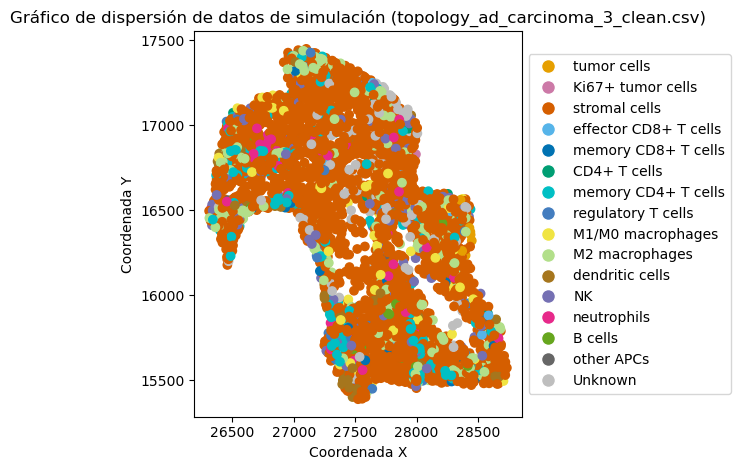

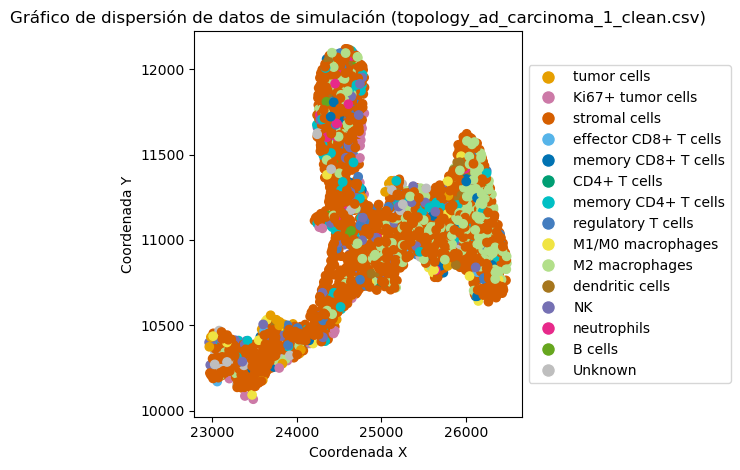

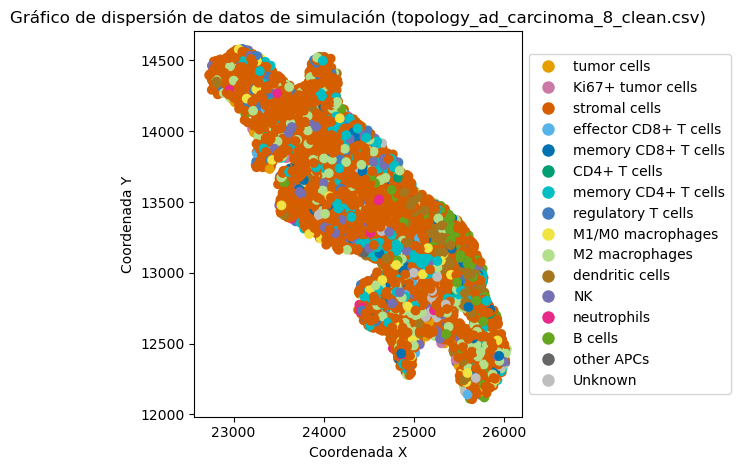

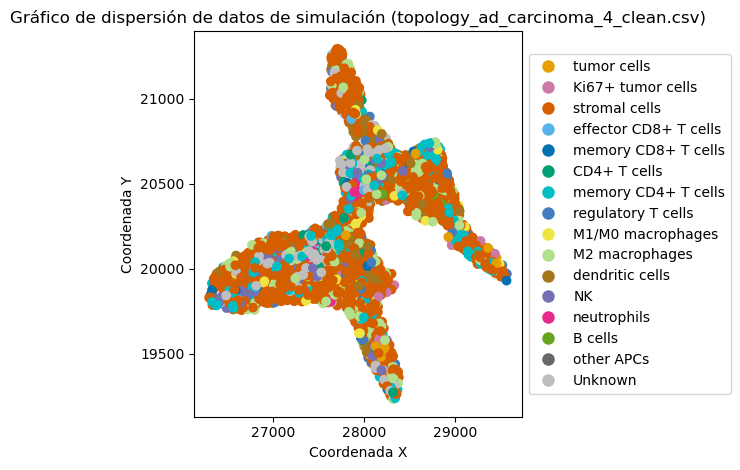

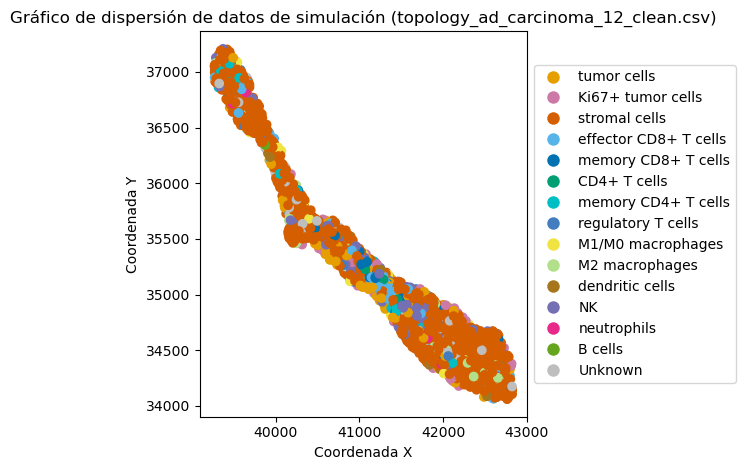

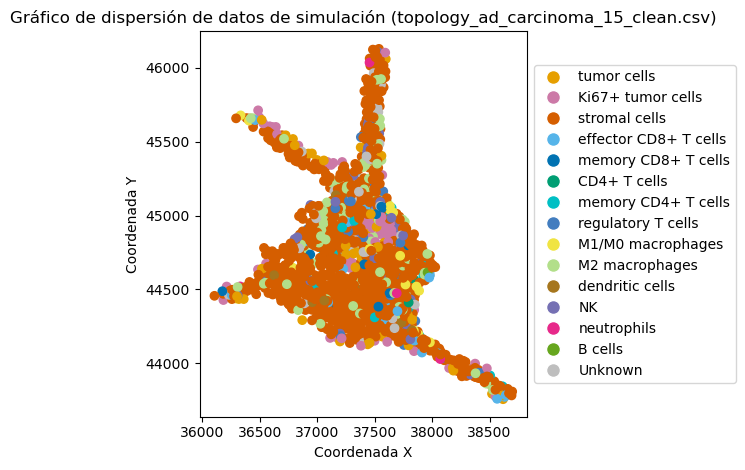

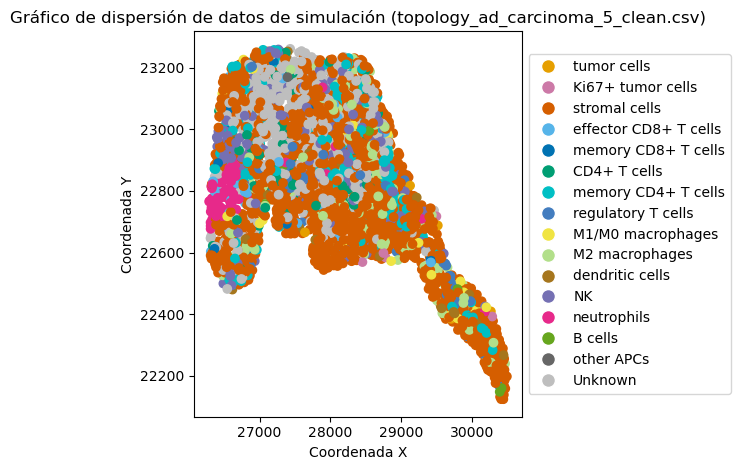

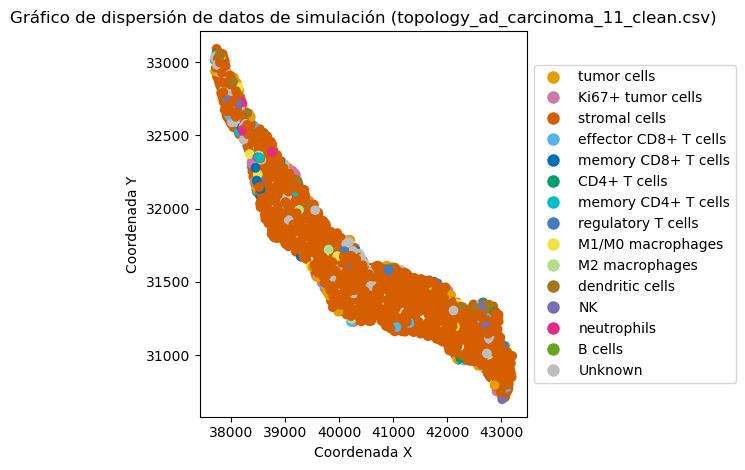

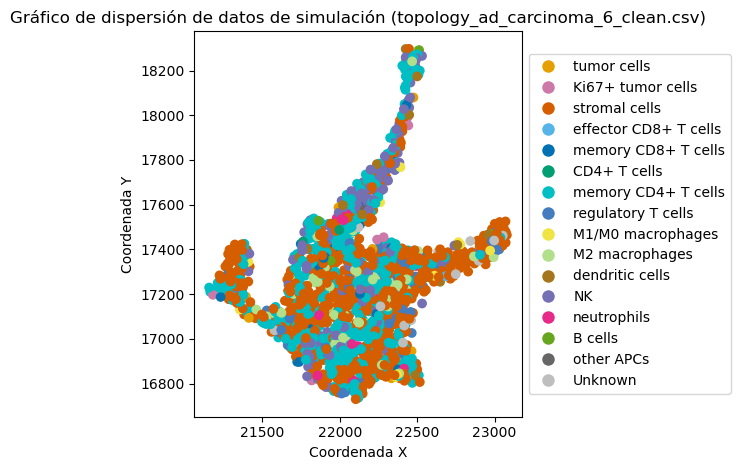

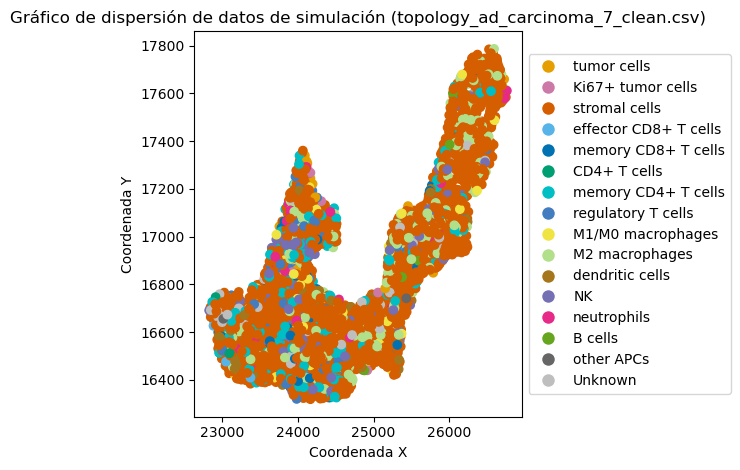

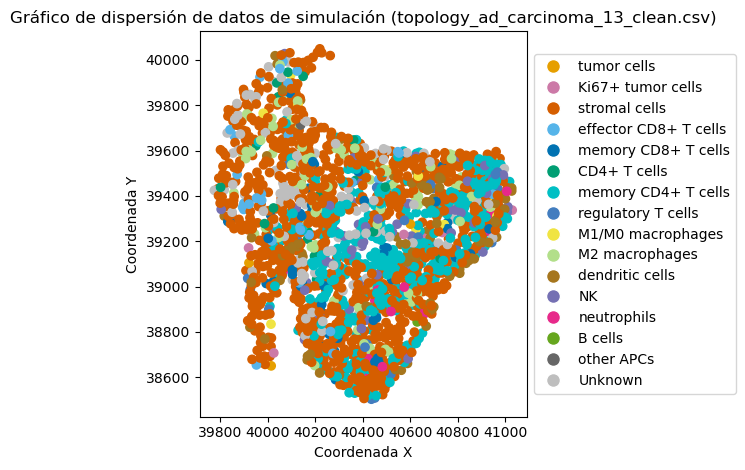

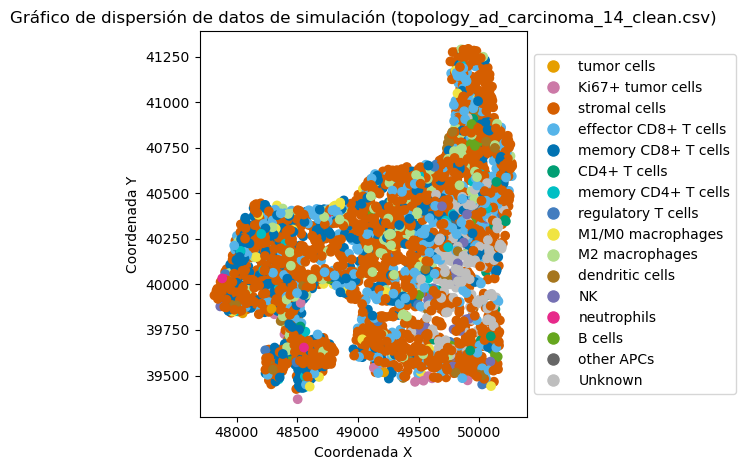

DataFrame 1:
       CellID    X_centroid    Y_centroid           phenotype
0        8999  20768.070522  11650.833568  Ki67+ tumor cells 
1        9344  19005.003425  11177.708904       stromal cells
2       17656  19197.455301  11807.690229       stromal cells
3       23136  19063.155039  11416.310078       stromal cells
4       25531  18991.497854  11431.993562       stromal cells
...       ...           ...           ...                 ...
2475  1041575  20378.417722  11536.829114          other APCs
2476  1041601  19313.096552  11813.020690       stromal cells
2477  1042372  19041.054054  12444.751351       stromal cells
2478  1042689  19115.703704  11435.703704       stromal cells
2479  1042883  20760.656000  12276.368000       stromal cells

[2480 rows x 4 columns]

DataFrame 2:
       CellID    X_centroid    Y_centroid           phenotype
0        2118  30119.567568  23776.225225       stromal cells
1        2892  30858.143089  23356.053659  Ki67+ tumor cells 
2        4360  298

In [9]:
# Definir un diccionario de colores para cada fenotipo
color_map = {
    # Células tumorales y estromales - Tonos marrones y naranjas
    'tumor cells': '#E69F00',           # Naranja brillante
    'Ki67+ tumor cells ': '#CC79A7',    # Rosa-púrpura
    'stromal cells': '#D55E00',         # Naranja rojizo
    
    # Células T - Tonos azules y grises
    'effector CD8+ T cells': '#56B4E9', # Azul cielo
    'memory CD8+ T cells': '#0072B2',   # Azul oscuro
    'CD4+ T cells': '#009E73',          # Verde azulado
    'memory CD4+ T cells': '#00BFC4',   # Turquesa
    'regulatory T cells': '#437DBF',     # Azul medio
    
    # Macrófagos y células dendríticas - Tonos amarillos y verdes
    'M1/M0 macrophages': '#F0E442',     # Amarillo
    'M2 macrophages': '#B2DF8A',        # Verde claro
    'dendritic cells': '#A6761D',       # Marrón dorado
    
    # Otras células inmunes - Patrones distintos
    'NK': '#7570B3',                    # Púrpura grisáceo
    'neutrophils': '#E7298A',           # Magenta
    'B cells': '#66A61E',               # Verde oliva
    'other APCs': '#666666',            # Gris medio
    
    # Otros
    'Unknown': '#BEBEBE',               # Gris claro
}

# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/ad_Car/"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Inicializar una lista para almacenar los DataFrames
dataframes = []

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas X, Y y el fenotipo
    X = df['X_centroid']
    Y = df['Y_centroid']
    fenotipo = df['phenotype']
    
    # Crear un mapa de colores basado en los fenotipos
    #unique_fenotipos = fenotipo.unique()
    #colors = plt.cm.get_cmap('hsv', len(unique_fenotipos))  # Usando una paleta de colores
    #color_map = {fenotipo: colors(i) for i, fenotipo in enumerate(unique_fenotipos)}
    
    # Asignar colores a cada punto según el fenotipo
    #colores_puntos = [color_map[t] for t in fenotipo]
      # Asignar colores a cada punto según el fenotipo
    colores_puntos = [color_map.get(t, '#000000') for t in fenotipo] 

    
    # Crear el gráfico de dispersión
    plt.scatter(X, Y, c=colores_puntos, label='Células')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Gráfico de dispersión de datos de simulación ({archivo_csv})')

    #plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=key, 
    #            markerfacecolor=color_map[key], markersize=10) for key in color_map])
    #plt.show()

    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key, 
                       markerfacecolor=color, markersize=10) 
                       for key, color in color_map.items() if key in fenotipo.unique()]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Agregar el DataFrame a la lista
    dataframes.append(df)

# Imprimir los DataFrames
for i, df in enumerate(dataframes):
    print(f"DataFrame {i+1}:")
    print(df)
    print()

# Inicializar una lista para almacenar las matrices de distancias
matrices_distancias = []

# Iterar sobre cada DataFrame
for df in dataframes:
    # Calcular la matriz de distancias
    matrix_distance = pdist(df[['X_centroid', 'Y_centroid']], metric='euclidean')
    matrices_distancias.append(squareform(matrix_distance))

# Imprimir las matrices de distancias
for i, matrix in enumerate(matrices_distancias):
    print(f"Matriz de distancias para DataFrame {i+1}:")
    print(matrix)
    print()

# Iterar sobre cada matriz de distancias
for i, matrix_distance in enumerate(matrices_distancias):
    # Obtener la forma de la matriz de distancias
    forma_matriz = np.shape(matrix_distance)[0]
    print(f"Forma de la matriz de distancias para DataFrame {i+1}: {forma_matriz}")
    
    # Calcular el valor máximo
    maximo = matrix_distance.max()
    print(f"Valor máximo de la matriz de distancias: {maximo}")
    
    # Calcular el valor mínimo
    minimo = matrix_distance.min()
    print(f"Valor mínimo de la matriz de distancias: {minimo}")
    
    # Calcular el promedio
    promedio = matrix_distance.mean()
    print(f"Promedio de la matriz de distancias: {promedio}")

In [8]:
# # Crear un conjunto para almacenar todos los tipos únicos
# tipos_unicos = set()

# # Para cada archivo CSV
# for archivo_csv in archivos_csv:
#     ruta_completa = os.path.join(ruta_directorio, archivo_csv)
#     df = pd.read_csv(ruta_completa)
#     nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
#     df.columns = nombres_columnas
    
#     # Añadir los tipos únicos de este archivo al conjunto
#     tipos_unicos.update(df['phenotype'].unique())

# # Convertir a lista y ordenar para mejor visualización
# tipos_unicos_lista = sorted(list(tipos_unicos))

# print("Todos los tipos únicos de células encontrados en todos los archivos:")
# for tipo in tipos_unicos_lista:
#     print(f"- {tipo}")

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gudhi as gd  # Asegúrate de tener instalada la librería Gudhi

def calcular_rips_y_persistencia(ruta_centroides):
    # Crear la carpeta para guardar los diagramas de persistencia si no existe
    ruta_persistencia = os.path.join(ruta_centroides, "persistencia")
    if not os.path.exists(ruta_persistencia):
        os.makedirs(ruta_persistencia)

    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_centroides) if archivo.endswith('.csv')]

    # Iterar sobre cada archivo de centroides
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_centroides, archivo_csv)
        
        # Leer el archivo CSV
        df = pd.read_csv(ruta_completa)
        
        # Extraer las coordenadas de los centroides
        centroides_x = df['X_centroid'].tolist()
        centroides_y = df['Y_centroid'].tolist()
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(centroides_x, centroides_y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=180)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

        # Visualizar el complejo de Rips y el diagrama de persistencia
        plt.figure(figsize=(12, 5))

        # Subplot 1: Complejo de Rips
        plt.subplot(1, 2, 1)
        plt.scatter(centroides_x, centroides_y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas (simplexes de dimensión 1)
                arista = simplex[0]
                x = [centroides_x[i] for i in arista]
                y = [centroides_y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Corregir la estructura de los datos de persistencia para el DataFrame
        persistencia_aplanada = []
        for d in diag:
            dimension, (birth, death) = d
            persistencia_aplanada.append([dimension, birth, death])

        # Guardar los datos de persistencia en un DataFrame
        diagram_df = pd.DataFrame(persistencia_aplanada, columns=['dimension', 'birth', 'death'])

        # Filtrar solo para las dimensiones 0 y 1 (si aplica)
        diagram_df = diagram_df[diagram_df['dimension'] <= 1]

        # Guardar el diagrama de persistencia en formato CSV para futuras comparaciones
        nombre_diagrama_csv = f"{os.path.splitext(archivo_csv)[0]}.csv"
        ruta_diagrama_csv = os.path.join(ruta_persistencia, nombre_diagrama_csv)
        diagram_df.to_csv(ruta_diagrama_csv, index=False)

        # Subplot 2: Diagrama de Persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        # Guardar la figura del diagrama en la carpeta de persistencia
        nombre_imagen = f"{os.path.splitext(archivo_csv)[0]}_rips_persistencia.png"
        ruta_imagen = os.path.join(ruta_persistencia, nombre_imagen)
        plt.tight_layout()
        plt.savefig(ruta_imagen)
        plt.close()  # Cerrar el gráfico para no sobrecargar la memoria

        print(f'Gráfico de Rips y diagrama de persistencia guardados para {archivo_csv} en {ruta_persistencia}.')



Gráfico de Rips y diagrama de persistencia guardados para topology_dysplasia_18_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/displasia/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para topology_dysplasia_5_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/displasia/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para topology_dysplasia_14_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/displasia/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para topology_dysplasia_13_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/displasia/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para topology_dysplasia_17_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/displasia/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para topology

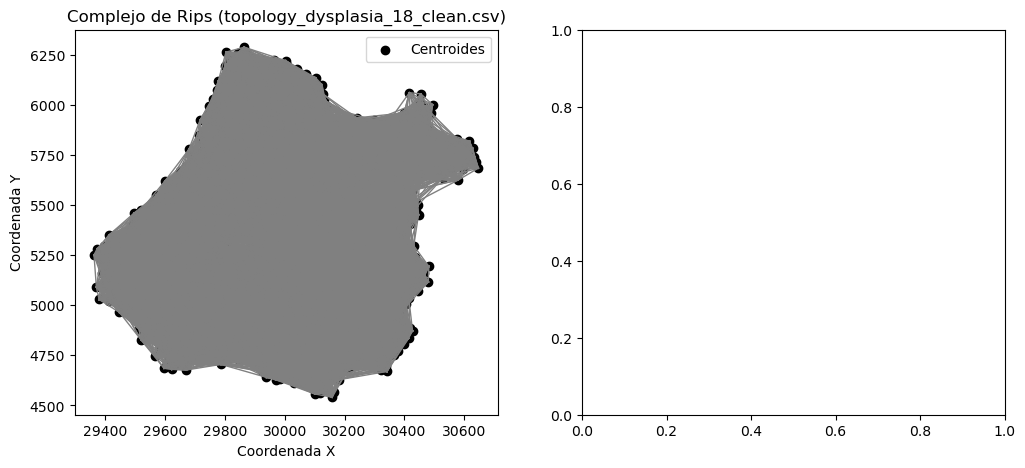

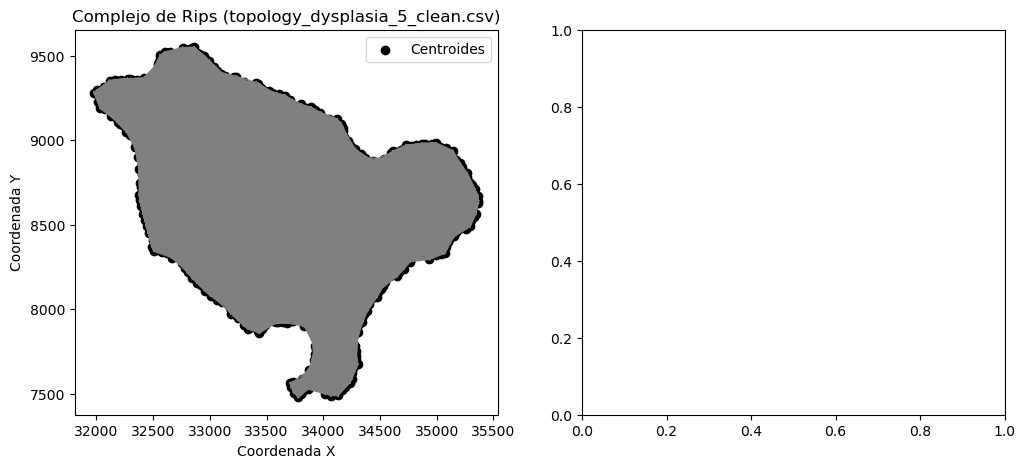

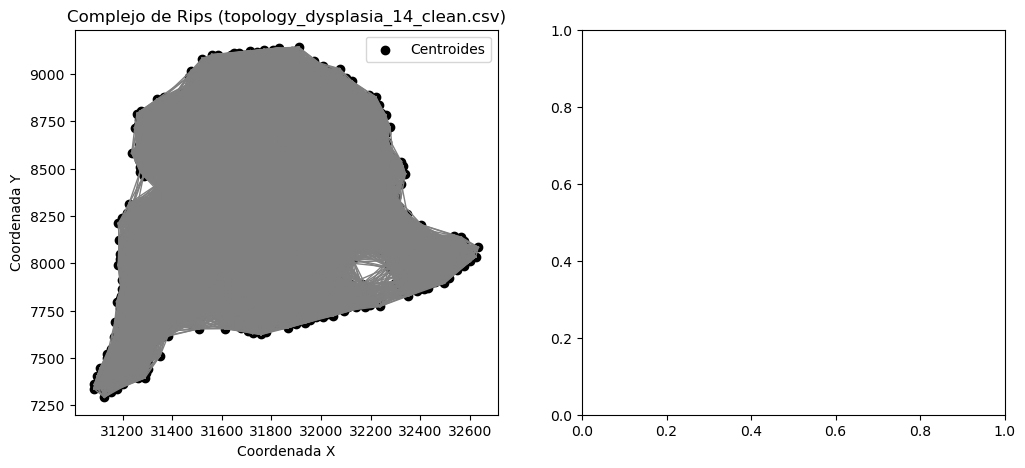

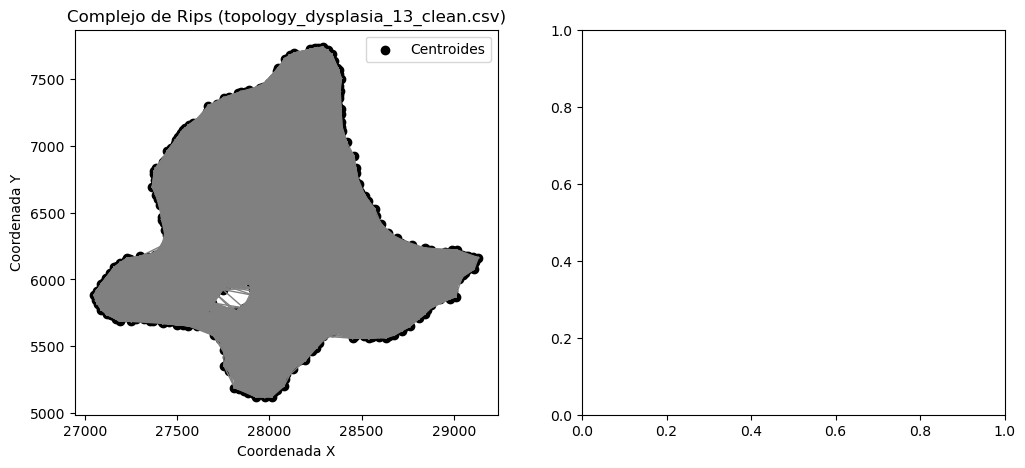

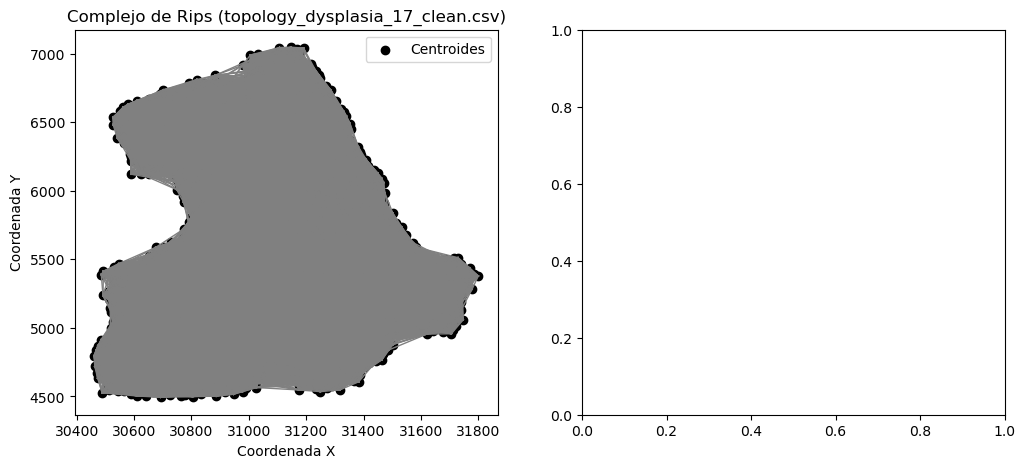

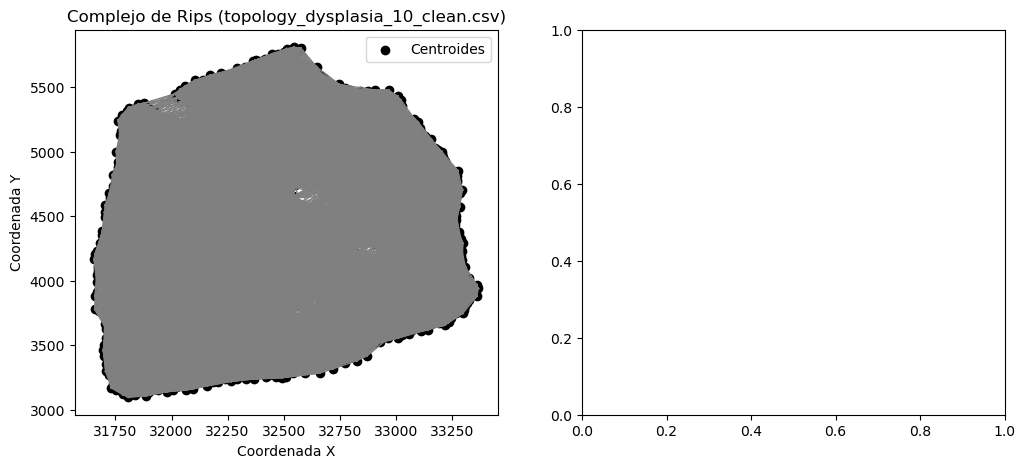

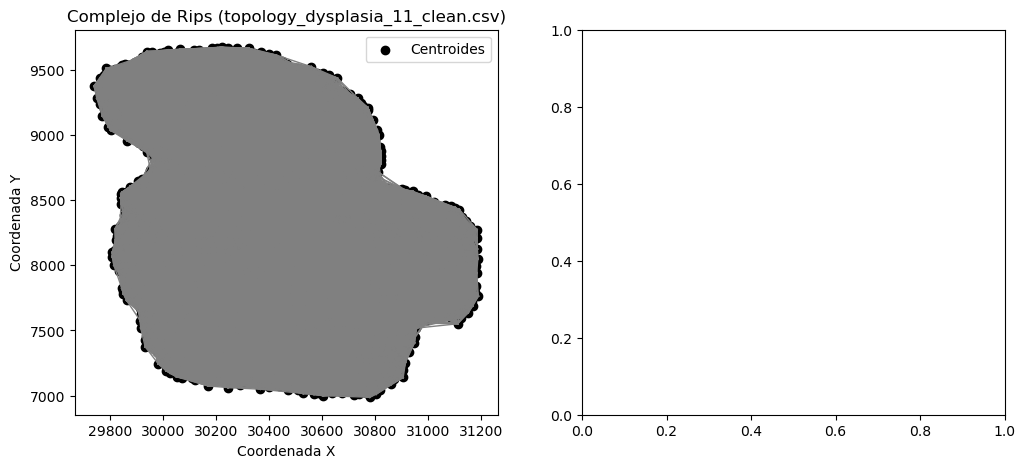

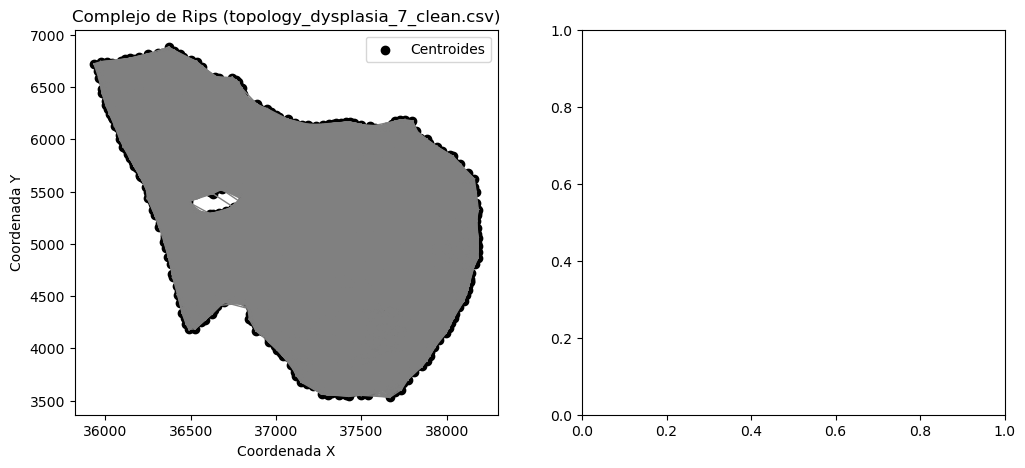

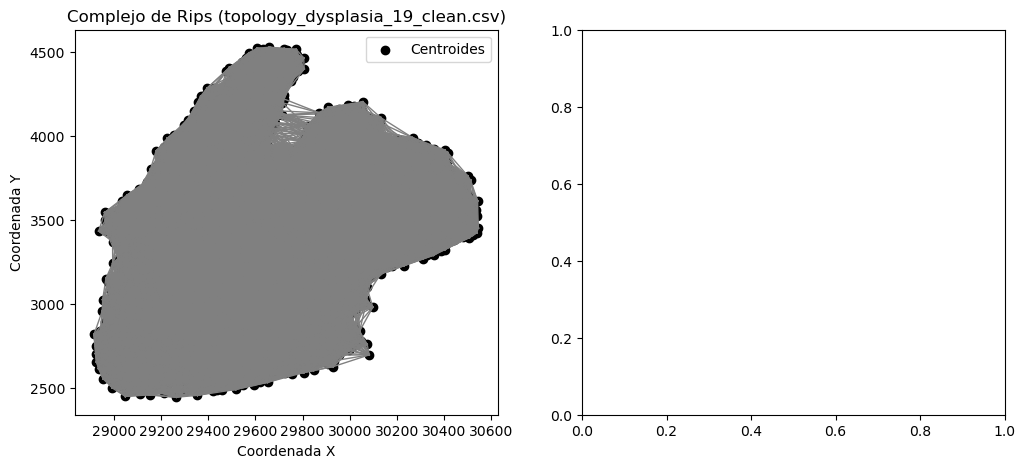

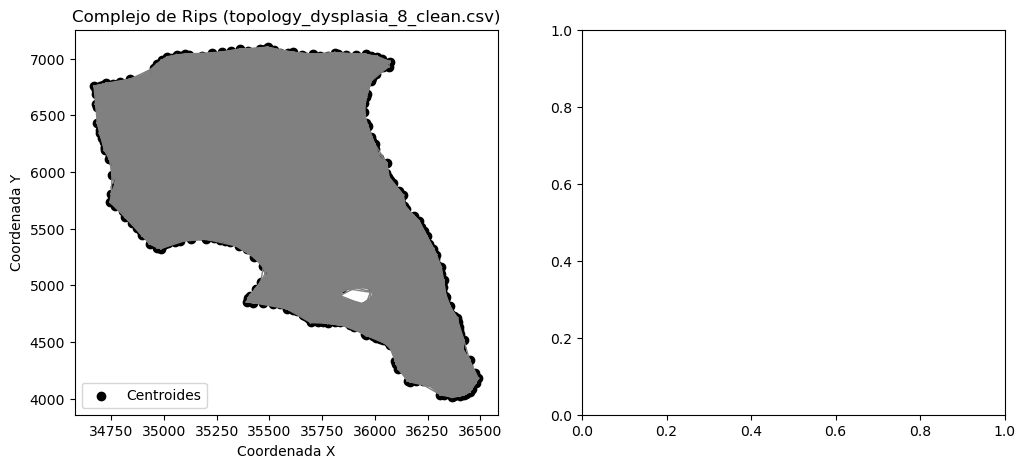

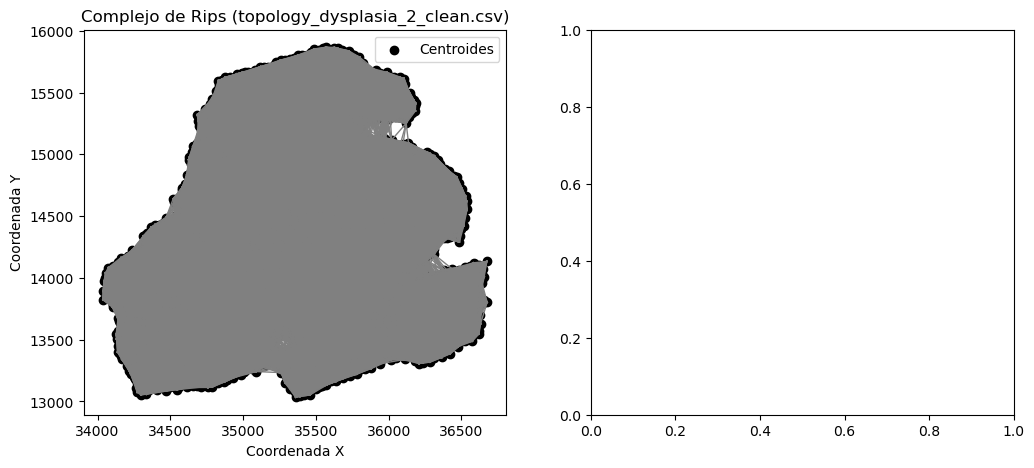

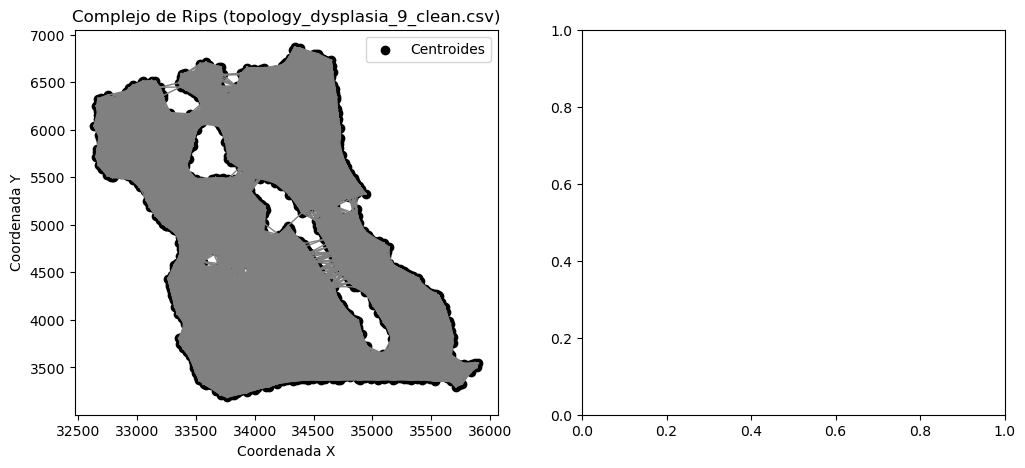

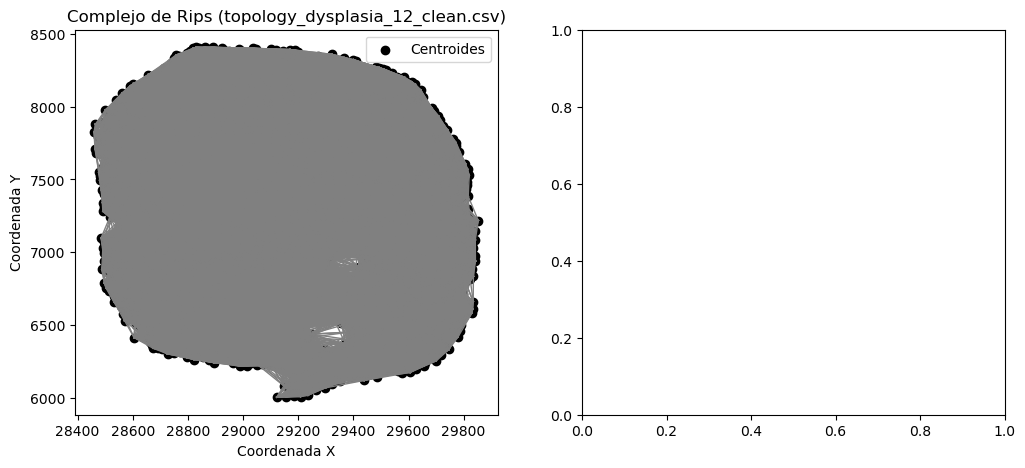

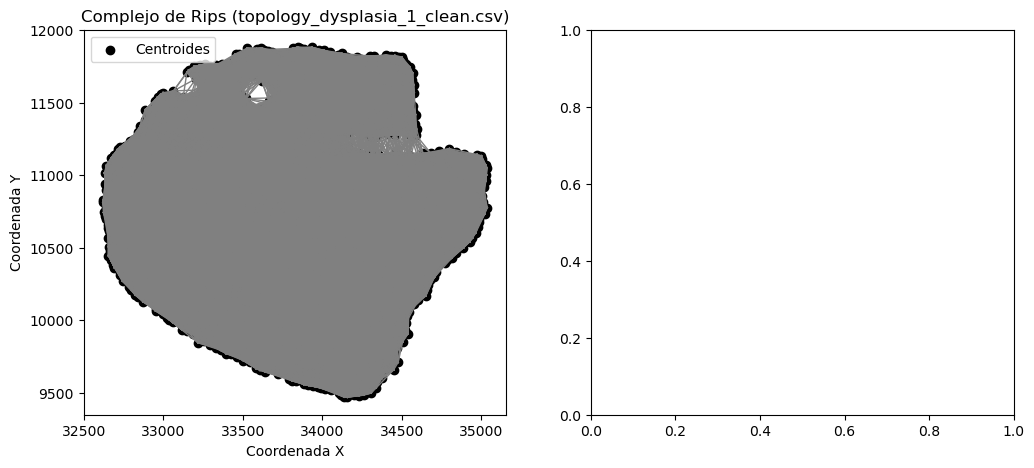

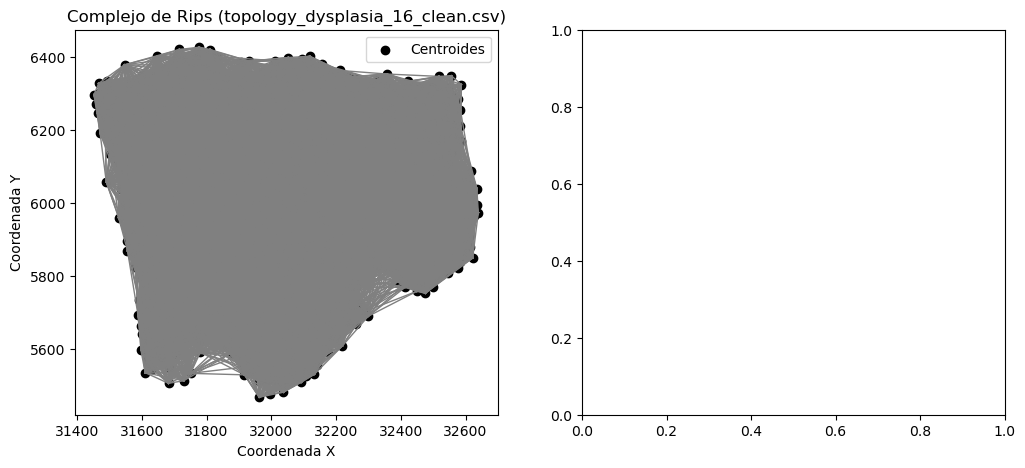

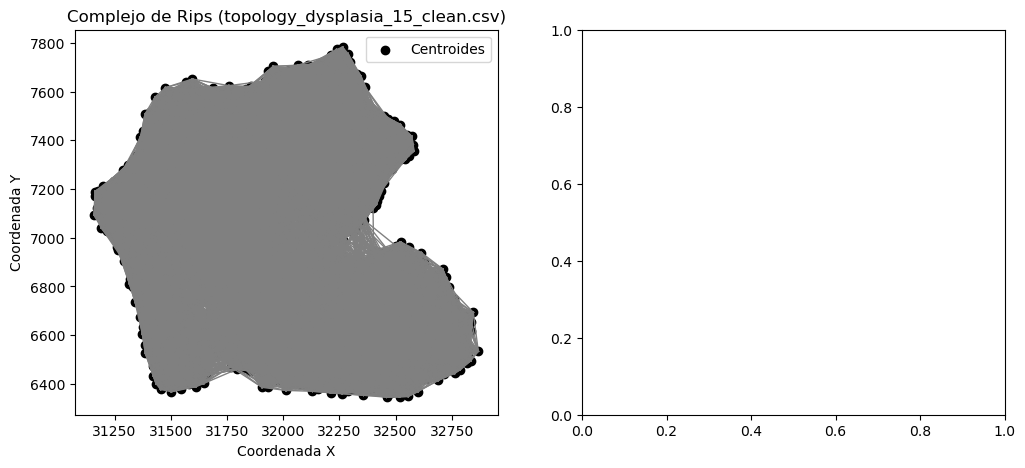

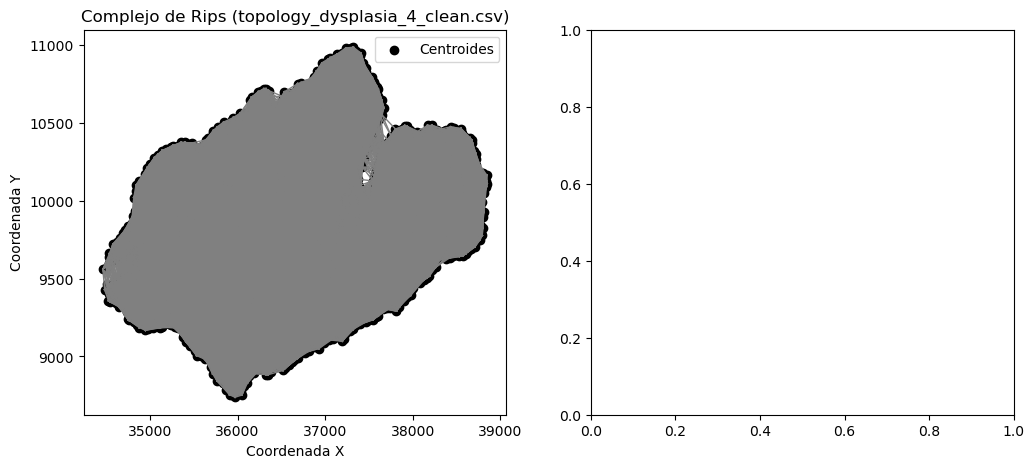

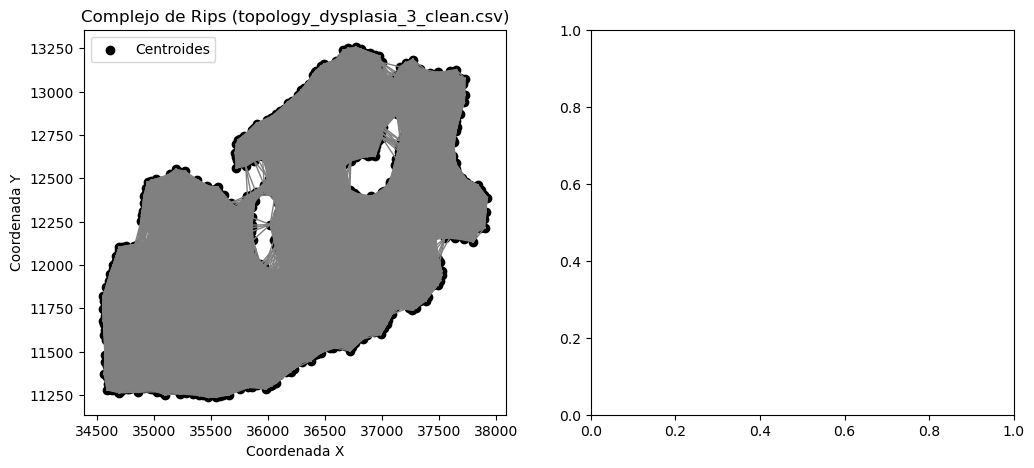

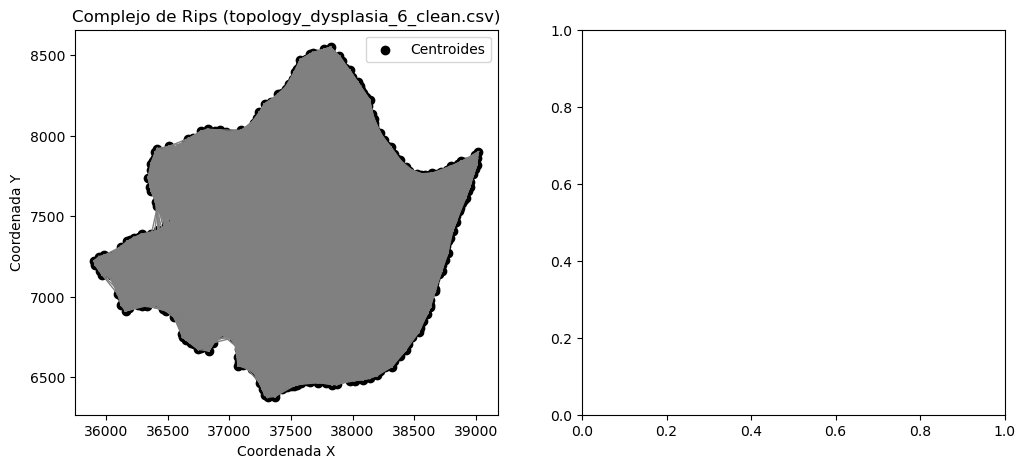

In [33]:
calcular_rips_y_persistencia("/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/displasia/")

In [13]:
import os
import pandas as pd
import numpy as np
import gudhi as gd

def calcular_distancia_bottleneck(ruta_directorio):
    # Crear la carpeta de salida
    carpeta_salida = os.path.join(ruta_directorio, "distancia de cuello de botella")
    os.makedirs(carpeta_salida, exist_ok=True)

    # Almacenar los diagramas de persistencia
    diagramas_persistencia = {}
    diagramas_persistencia_0 = {}

    # Listar todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        try:
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(ruta_directorio, archivo_csv)
            
            # Leer el archivo CSV y asignar nombres de columnas
            df = pd.read_csv(ruta_completa, header=0)  # Usar la primera fila como cabecera
            
            # Asegúrate de que el DataFrame tenga las columnas correctas
            if 'birth' not in df.columns or 'death' not in df.columns:
                print(f"El archivo {archivo_csv} no contiene las columnas 'birth' o 'death'.")
                continue
            
            # Convertir columnas 'birth' y 'death' a flotantes
            df['birth'] = df['birth'].astype(float)
            df['death'] = df['death'].astype(float)

            # Almacenar el diagrama de persistencia en dimensión 1
            diag_1 = df[df['dimension'] == 1][['birth', 'death']].to_numpy()
            diagramas_persistencia[archivo_csv] = diag_1
            
            # Almacenar el diagrama de persistencia en dimensión 0
            diag_0 = df[df['dimension'] == 0][['birth', 'death']].to_numpy()
            diagramas_persistencia_0[archivo_csv] = diag_0
            
        except Exception as e:
            print(f"Error al procesar el archivo {archivo_csv}: {e}")

    # Calcular las distancias de Bottleneck entre todos los pares de diagramas de persistencia
    archivos = list(diagramas_persistencia.keys())
    n = len(archivos)
    tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

    # Inicializar matrices de distancias
    distancias_dim1 = np.zeros((n, n))
    distancias_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[archivo_i]
            diag_j = diagramas_persistencia[archivo_j]
            diag_i_0 = diagramas_persistencia_0[archivo_i]
            diag_j_0 = diagramas_persistencia_0[archivo_j]
            
            # Calcular distancias de Bottleneck
            distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
            distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)
            
            distancias_dim1[i, j] = distancia_bottleneck
            distancias_dim1[j, i] = distancia_bottleneck
            distancias_dim0[i, j] = distancia_bottleneck_0
            distancias_dim0[j, i] = distancia_bottleneck_0
            
            # Verificar que la distancia de Bottleneck para el mismo archivo es efectivamente cero
            if i == j:
                if distancia_bottleneck < tolerancia:
                    print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} es efectivamente cero.")
                else:
                    print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} no es cero: {distancia_bottleneck}")
                
                if distancia_bottleneck_0 < tolerancia:
                    print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} es efectivamente cero.")
                else:
                    print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} no es cero: {distancia_bottleneck_0}")

    # Guardar las matrices de distancias en CSV
    pd.DataFrame(distancias_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_bottleneck_dim1.csv'))
    pd.DataFrame(distancias_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_bottleneck_dim0.csv'))


In [34]:

calcular_distancia_bottleneck('/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/displasia/persistencia/')


Distancia de Bottleneck (Dimensión 1) para topology_dysplasia_18_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para topology_dysplasia_18_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para topology_dysplasia_5_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para topology_dysplasia_5_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para topology_dysplasia_14_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para topology_dysplasia_14_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para topology_dysplasia_13_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para topology_dysplasia_13_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para topology_dysplasia_17_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para topology_dysplasia_17_clean.csv es efectivamente cero.
Distancia de Bottlenec

In [15]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import gudhi.wasserstein as gw

def distancias(ruta_directorio):
    # Crear la carpeta de salida
    carpeta_salida = os.path.join(ruta_directorio, "distancias")
    os.makedirs(carpeta_salida, exist_ok=True)

    # Almacenar los diagramas de persistencia
    diagramas_persistencia = {}
    diagramas_persistencia_0 = {}

    # Listar todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        try:
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(ruta_directorio, archivo_csv)
            
            # Leer el archivo CSV y asignar nombres de columnas
            df = pd.read_csv(ruta_completa, header=0)  # Usar la primera fila como cabecera
            
            # Asegúrate de que el DataFrame tenga las columnas correctas
            if 'birth' not in df.columns or 'death' not in df.columns:
                print(f"El archivo {archivo_csv} no contiene las columnas 'birth' o 'death'.")
                continue
            
            # Convertir columnas 'birth' y 'death' a flotantes
            df['birth'] = df['birth'].astype(float)
            df['death'] = df['death'].astype(float)

            # Almacenar el diagrama de persistencia en dimensión 1
            diag_1 = df[df['dimension'] == 1][['birth', 'death']].to_numpy()
            diagramas_persistencia[archivo_csv] = diag_1
            
            # Almacenar el diagrama de persistencia en dimensión 0
            diag_0 = df[df['dimension'] == 0][['birth', 'death']].to_numpy()
            diagramas_persistencia_0[archivo_csv] = diag_0
            
        except Exception as e:
            print(f"Error al procesar el archivo {archivo_csv}: {e}")

    # Calcular las distancias entre todos los pares de diagramas de persistencia
    archivos = list(diagramas_persistencia.keys())
    n = len(archivos)
    tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

    # Inicializar matrices de distancias
    distancias_bottleneck_dim1 = np.zeros((n, n))
    distancias_bottleneck_dim0 = np.zeros((n, n))
    distancias_wasserstein_dim1 = np.zeros((n, n))
    distancias_wasserstein_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[archivo_i]
            diag_j = diagramas_persistencia[archivo_j]
            diag_i_0 = diagramas_persistencia_0[archivo_i]
            diag_j_0 = diagramas_persistencia_0[archivo_j]
            
            # Calcular distancias de Bottleneck
            distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
            distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)
            
            # Calcular distancias de Wasserstein
            distancia_wasserstein = gw.wasserstein_distance(diag_i, diag_j, order=1)
            distancia_wasserstein_0 = gw.wasserstein_distance(diag_i_0, diag_j_0, order=1)
            
            # Almacenar las distancias en las matrices
            distancias_bottleneck_dim1[i, j] = distancias_bottleneck_dim1[j, i] = distancia_bottleneck
            distancias_bottleneck_dim0[i, j] = distancias_bottleneck_dim0[j, i] = distancia_bottleneck_0
            distancias_wasserstein_dim1[i, j] = distancias_wasserstein_dim1[j, i] = distancia_wasserstein
            distancias_wasserstein_dim0[i, j] = distancias_wasserstein_dim0[j, i] = distancia_wasserstein_0
            
            # Verificar que las distancias para el mismo archivo son efectivamente cero
            if i == j:
                if distancia_bottleneck < tolerancia and distancia_wasserstein < tolerancia:
                    print(f"Distancias (Dimensión 1) para {archivo_i} son efectivamente cero.")
                else:
                    print(f"Distancias (Dimensión 1) para {archivo_i} no son cero: Bottleneck = {distancia_bottleneck}, Wasserstein = {distancia_wasserstein}")
                
                if distancia_bottleneck_0 < tolerancia and distancia_wasserstein_0 < tolerancia:
                    print(f"Distancias (Dimensión 0) para {archivo_i} son efectivamente cero.")
                else:
                    print(f"Distancias (Dimensión 0) para {archivo_i} no son cero: Bottleneck = {distancia_bottleneck_0}, Wasserstein = {distancia_wasserstein_0}")

    # Guardar las matrices de distancias en CSV
    pd.DataFrame(distancias_bottleneck_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_bottleneck_dim1.csv'))
    pd.DataFrame(distancias_bottleneck_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_bottleneck_dim0.csv'))
    pd.DataFrame(distancias_wasserstein_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_wasserstein_dim1.csv'))
    pd.DataFrame(distancias_wasserstein_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_wasserstein_dim0.csv'))

    print("Los cálculos de distancias se han completado y guardado en la carpeta 'distancias'.")

In [36]:
distancias("/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/displasia/persistencia/")

Distancias (Dimensión 1) para topology_dysplasia_18_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_dysplasia_18_clean.csv son efectivamente cero.
Distancias (Dimensión 1) para topology_dysplasia_5_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_dysplasia_5_clean.csv son efectivamente cero.
Distancias (Dimensión 1) para topology_dysplasia_14_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_dysplasia_14_clean.csv son efectivamente cero.
Distancias (Dimensión 1) para topology_dysplasia_13_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_dysplasia_13_clean.csv son efectivamente cero.
Distancias (Dimensión 1) para topology_dysplasia_17_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_dysplasia_17_clean.csv son efectivamente cero.
Distancias (Dimensión 1) para topology_dysplasia_10_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_dysplasia_10_clea

In [37]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def extract_levels(filename):
    # Extraer el número después de "dysplasia" en el nombre del archivo
    parts = filename.replace('.csv', '').split('_')
    for part in parts:
        if part.isdigit():
            return int(part)
    return 0  # En caso de que no se encuentre un número, asignamos 0

def sort_filenames(filenames):
    # Ordenar según el número extraído de los nombres
    return sorted(filenames, key=extract_levels)

def reorder_matrix(matrix, filenames):
    sorted_filenames = sort_filenames(filenames)
    indices = [filenames.index(name) for name in sorted_filenames]
    reordered_matrix = matrix[np.ix_(indices, indices)]
    return reordered_matrix, sorted_filenames

def plot_heatmap_and_clustermap(matrix, filenames, title, output_dir):
    reordered_matrix, sorted_filenames = reorder_matrix(matrix, filenames)
    
    # Heatmap
    plt.figure(figsize=(15, 12))
    sns.heatmap(reordered_matrix, 
                xticklabels=sorted_filenames, 
                yticklabels=sorted_filenames, 
                cmap='viridis', 
                annot=False,
                fmt=".2f", 
                cbar_kws={'label': 'Distancia'})
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f"Heatmap de {title}")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'heatmap_{title}.png'))
    plt.close()

    # Clustermap
    clustermap = sns.clustermap(reordered_matrix, 
                                xticklabels=sorted_filenames, 
                                yticklabels=sorted_filenames, 
                                cmap='viridis', 
                                annot=False,
                                fmt=".2f", 
                                figsize=(15, 12),
                                dendrogram_ratio=(.1, .2),
                                cbar_pos=(0, .2, .03, .4),
                                cbar_kws={'label': 'Distancia'})
    clustermap.ax_heatmap.set_xticklabels(
        clustermap.ax_heatmap.get_xticklabels(), 
        rotation=90, 
        fontsize=6)
    clustermap.ax_heatmap.set_yticklabels(
        clustermap.ax_heatmap.get_yticklabels(), 
        rotation=0, 
        fontsize=6)
    plt.title(f"Clustermap de {title}", pad=80)
    plt.savefig(os.path.join(output_dir, f'clustermap_{title}.png'))
    plt.close()

def crear_visualizaciones(ruta_directorio):
    carpeta_visualizacion = os.path.join(ruta_directorio, "visualizacion")
    os.makedirs(carpeta_visualizacion, exist_ok=True)

    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    for archivo in archivos_csv:
        nombre_base = os.path.splitext(archivo)[0]
        
        distancias = pd.read_csv(os.path.join(ruta_directorio, archivo), index_col=0)
        
        # Extraer los nombres de los archivos de las columnas
        filenames = list(distancias.columns)
        
        plot_heatmap_and_clustermap(distancias.values, filenames, nombre_base, carpeta_visualizacion)

    print("Las visualizaciones se han guardado.")

# Llamar a la función
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/displasia/persistencia/distancias/"
crear_visualizaciones(ruta_directorio)


Las visualizaciones se han guardado.


In [38]:
def procesar_patrones_multicelulares(ruta_base):
    
    # Paso 1: Calcular Rips y persistencia
    calcular_rips_y_persistencia(ruta_base)
    
    # Paso 2: Calcular distancias de cuello de botella
    calcular_distancia_bottleneck(ruta_base)
    
    # Paso 3: Calcular distancias
    distancias(ruta_base)
    
    # Paso 4: Crear visualizaciones
    crear_visualizaciones(ruta_base)

In [ ]:
procesar_patrones_multicelulares(

In [39]:
#Carcinoma 

In [40]:
#Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'X', 'Y',  'Tipo']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Mostrar las primeras filas del DataFrame
    print("Contenido de", archivo_csv)
    print(df.head(5))
    
    # Contar el número de IDs distintos
    num_ids_distintos = df['id'].nunique()
    print("Número de IDs distintos:", num_ids_distintos)

# Obtener una lista de fenotipos únicos
    fenotipos_unicos = df['Tipo'].unique().tolist()
    print("Fenotipos únicos:", fenotipos_unicos)

Contenido de topology_carcinoma_10_clean.csv
       id                   X                   Y                Tipo
0  CellID          X_centroid          Y_centroid           phenotype
1     608  27074.061266874352  18799.969885773626  Ki67+ tumor cells 
2     633  26526.325670498085   19240.22413793104  Ki67+ tumor cells 
3     675  26582.102941176472   18796.95053475936         tumor cells
4    1236  26773.749103942653  18676.582795698923         tumor cells
Número de IDs distintos: 3826
Fenotipos únicos: ['phenotype', 'Ki67+ tumor cells ', 'tumor cells', 'neutrophils', 'stromal cells', 'M1/M0 macrophages', 'NK', 'M2 macrophages', 'regulatory T cells', 'memory CD4+ T cells', 'effector CD8+ T cells', 'Unknown', 'B cells', 'CD4+ T cells', 'dendritic cells', 'memory CD8+ T cells', 'other APCs']
Contenido de topology_carcinoma_2_clean.csv
       id                   X                   Y                Tipo
0  CellID          X_centroid          Y_centroid           phenotype
1      12  

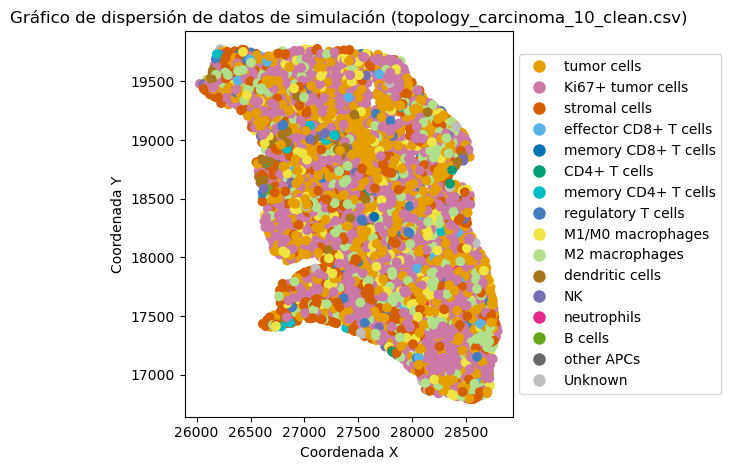

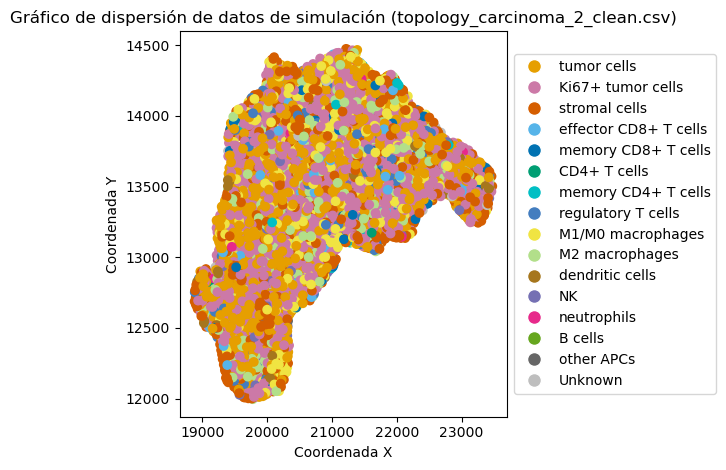

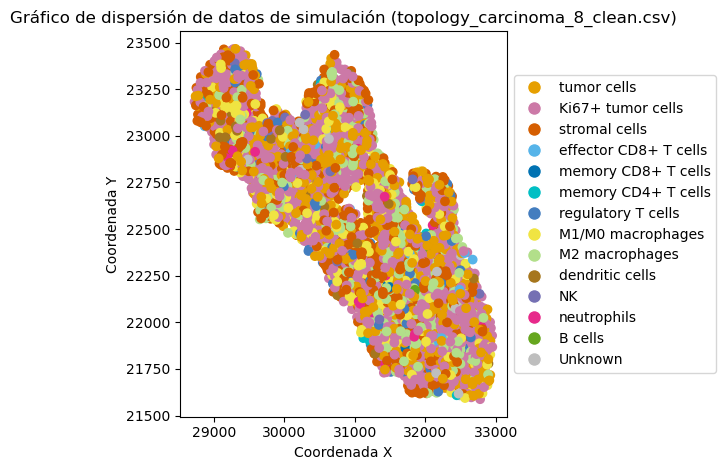

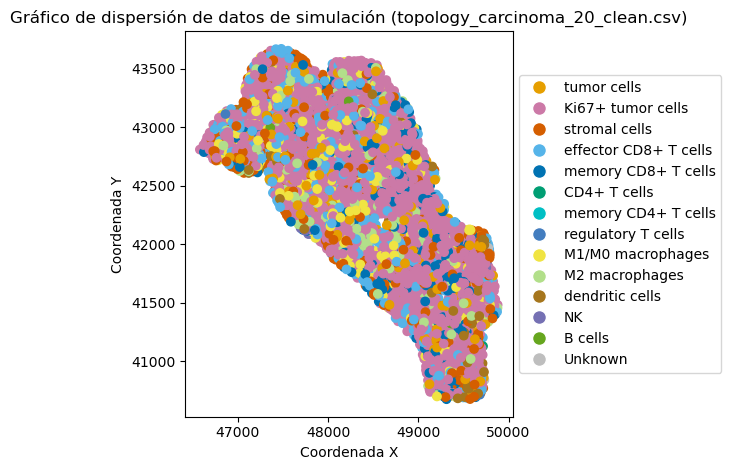

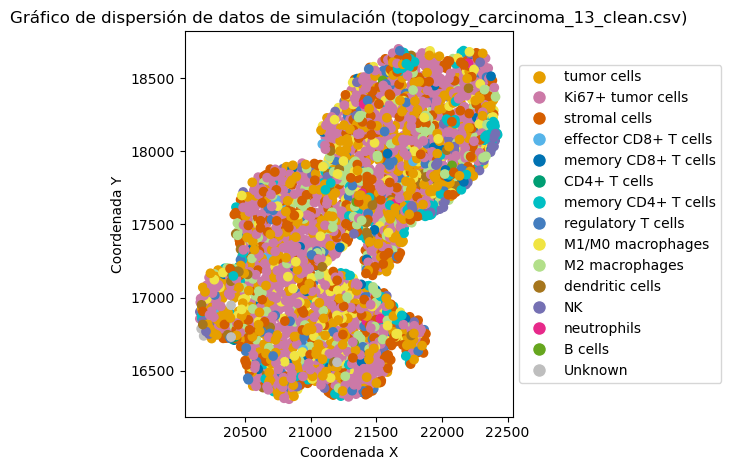

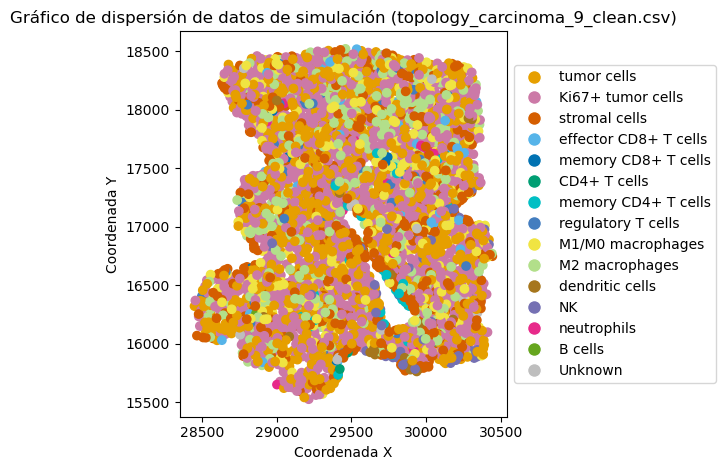

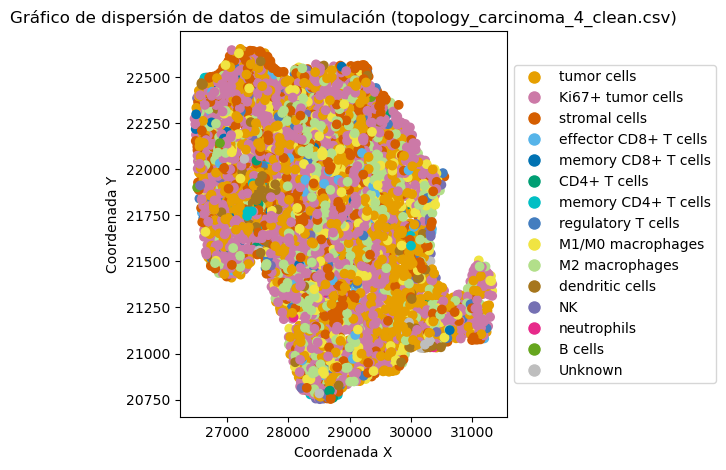

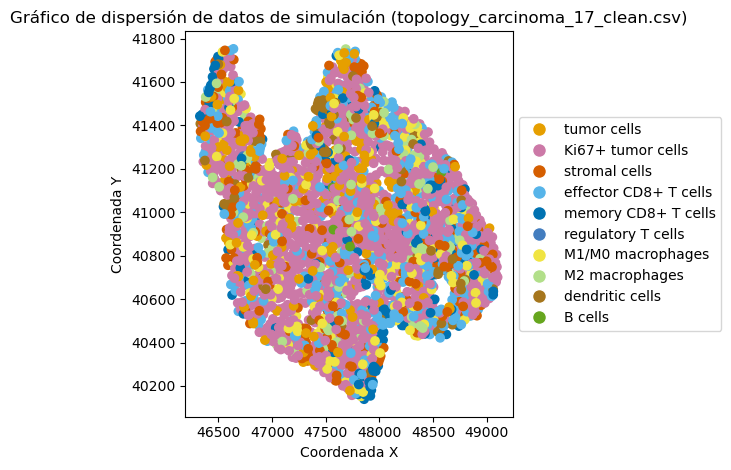

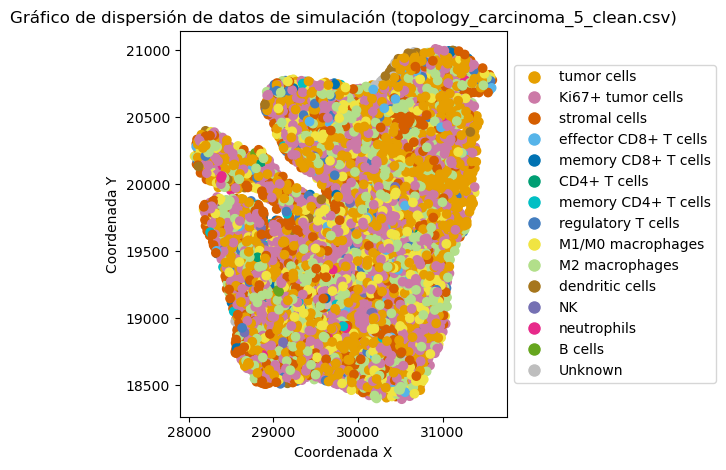

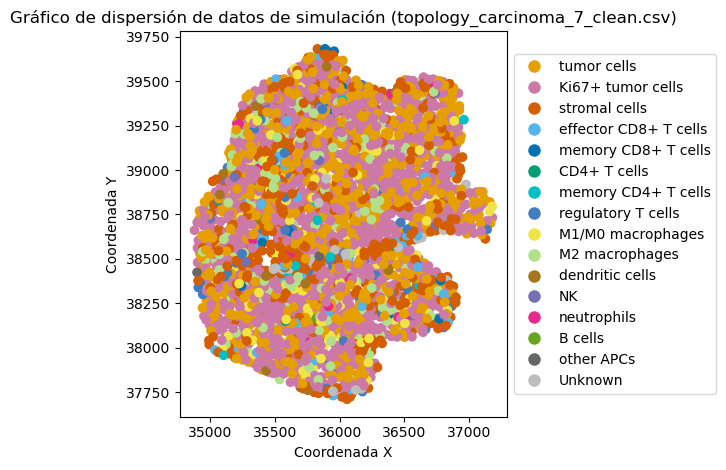

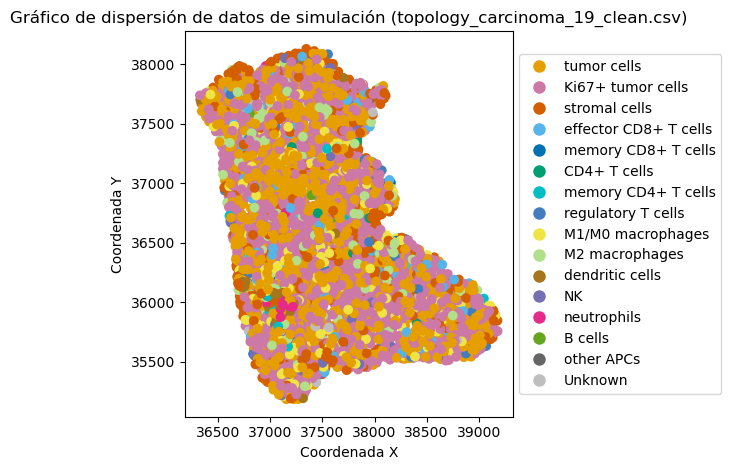

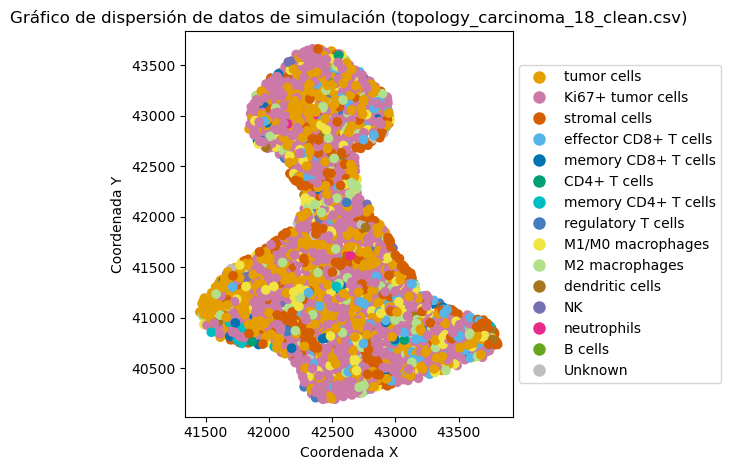

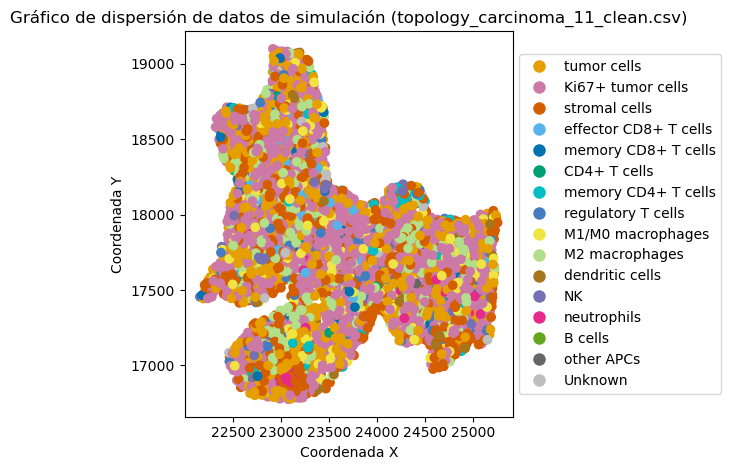

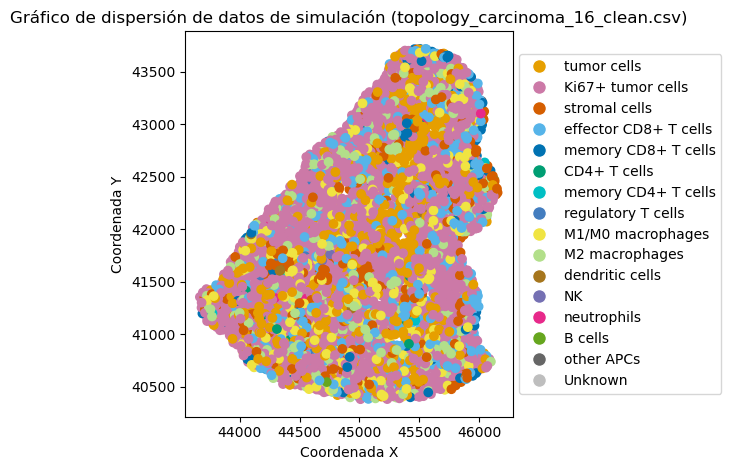

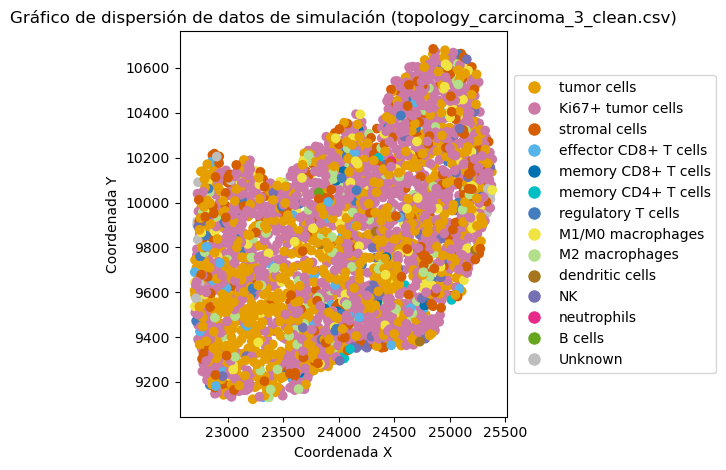

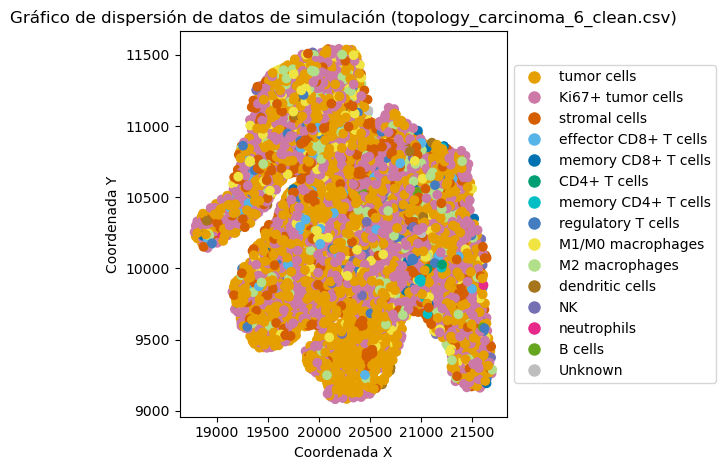

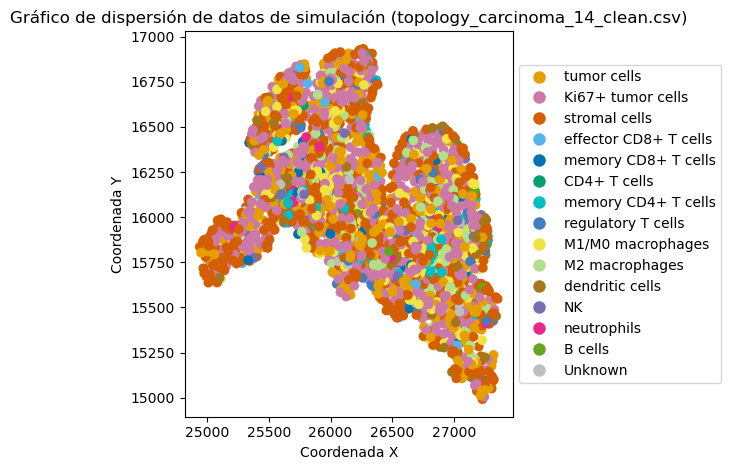

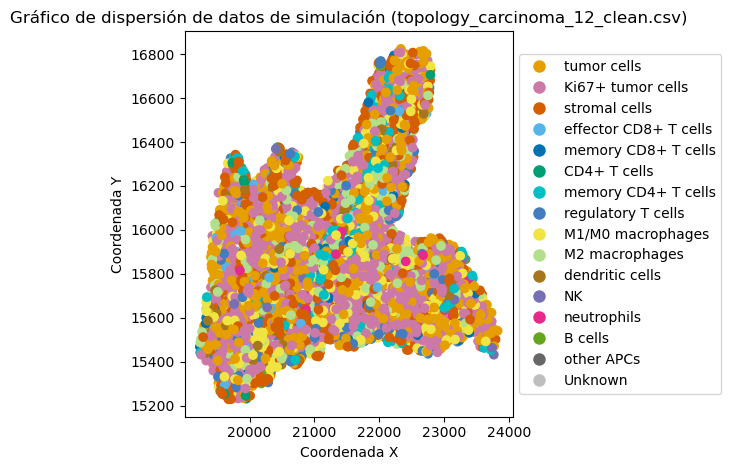

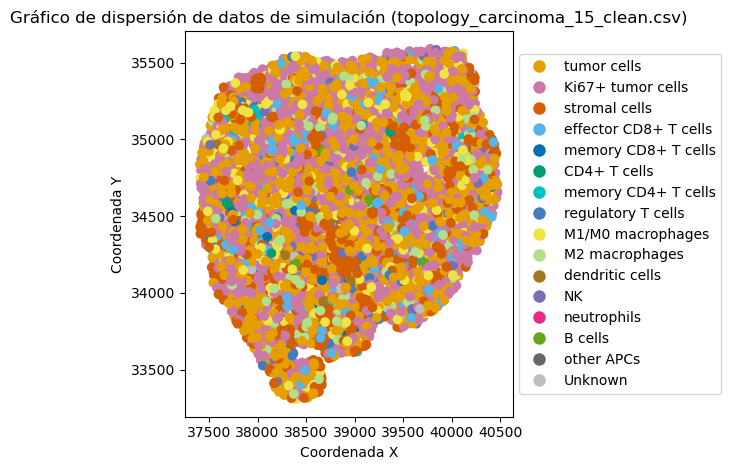

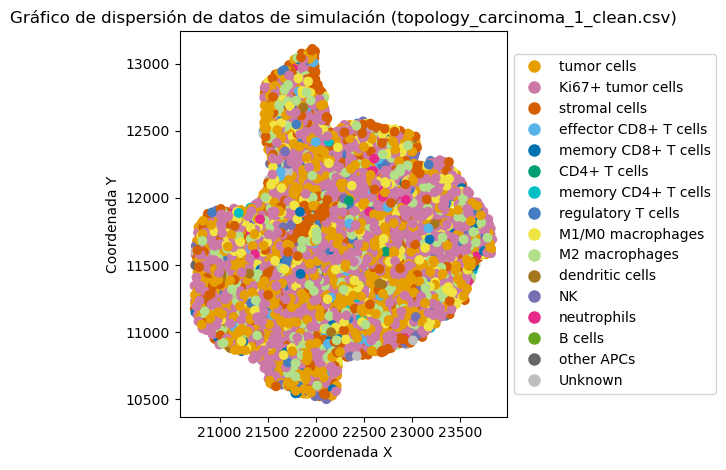

DataFrame 1:
       CellID    X_centroid    Y_centroid           phenotype
0         608  27074.061267  18799.969886  Ki67+ tumor cells 
1         633  26526.325670  19240.224138  Ki67+ tumor cells 
2         675  26582.102941  18796.950535         tumor cells
3        1236  26773.749104  18676.582796         tumor cells
4        1378  26686.374012  18169.374890  Ki67+ tumor cells 
...       ...           ...           ...                 ...
3820  1042203  26781.455959  18959.155440         tumor cells
3821  1042651  28051.557554  17492.989209   M1/M0 macrophages
3822  1042865  28253.329730  17238.767568       stromal cells
3823  1042889  26647.716763  19510.375723         tumor cells
3824  1042947  26725.553846  18552.707692       stromal cells

[3825 rows x 4 columns]

DataFrame 2:
       CellID    X_centroid    Y_centroid           phenotype
0          12  23052.685928  13718.266485  Ki67+ tumor cells 
1         553  20307.547945  13152.376712  Ki67+ tumor cells 
2         736  193

In [41]:
# Definir un diccionario de colores para cada fenotipo
color_map = {
    # Células tumorales y estromales - Tonos marrones y naranjas
    'tumor cells': '#E69F00',           # Naranja brillante
    'Ki67+ tumor cells ': '#CC79A7',    # Rosa-púrpura
    'stromal cells': '#D55E00',         # Naranja rojizo
    
    # Células T - Tonos azules y grises
    'effector CD8+ T cells': '#56B4E9', # Azul cielo
    'memory CD8+ T cells': '#0072B2',   # Azul oscuro
    'CD4+ T cells': '#009E73',          # Verde azulado
    'memory CD4+ T cells': '#00BFC4',   # Turquesa
    'regulatory T cells': '#437DBF',     # Azul medio
    
    # Macrófagos y células dendríticas - Tonos amarillos y verdes
    'M1/M0 macrophages': '#F0E442',     # Amarillo
    'M2 macrophages': '#B2DF8A',        # Verde claro
    'dendritic cells': '#A6761D',       # Marrón dorado
    
    # Otras células inmunes - Patrones distintos
    'NK': '#7570B3',                    # Púrpura grisáceo
    'neutrophils': '#E7298A',           # Magenta
    'B cells': '#66A61E',               # Verde oliva
    'other APCs': '#666666',            # Gris medio
    
    # Otros
    'Unknown': '#BEBEBE',               # Gris claro
}

# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Inicializar una lista para almacenar los DataFrames
dataframes = []

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas X, Y y el fenotipo
    X = df['X_centroid']
    Y = df['Y_centroid']
    fenotipo = df['phenotype']
    
    # Crear un mapa de colores basado en los fenotipos
    #unique_fenotipos = fenotipo.unique()
    #colors = plt.cm.get_cmap('hsv', len(unique_fenotipos))  # Usando una paleta de colores
    #color_map = {fenotipo: colors(i) for i, fenotipo in enumerate(unique_fenotipos)}
    
    # Asignar colores a cada punto según el fenotipo
    #colores_puntos = [color_map[t] for t in fenotipo]
      # Asignar colores a cada punto según el fenotipo
    colores_puntos = [color_map.get(t, '#000000') for t in fenotipo] 

    
    # Crear el gráfico de dispersión
    plt.scatter(X, Y, c=colores_puntos, label='Células')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Gráfico de dispersión de datos de simulación ({archivo_csv})')

    #plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=key, 
    #            markerfacecolor=color_map[key], markersize=10) for key in color_map])
    #plt.show()

    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key, 
                       markerfacecolor=color, markersize=10) 
                       for key, color in color_map.items() if key in fenotipo.unique()]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Agregar el DataFrame a la lista
    dataframes.append(df)

# Imprimir los DataFrames
for i, df in enumerate(dataframes):
    print(f"DataFrame {i+1}:")
    print(df)
    print()

# Inicializar una lista para almacenar las matrices de distancias
matrices_distancias = []

# Iterar sobre cada DataFrame
for df in dataframes:
    # Calcular la matriz de distancias
    matrix_distance = pdist(df[['X_centroid', 'Y_centroid']], metric='euclidean')
    matrices_distancias.append(squareform(matrix_distance))

# Imprimir las matrices de distancias
for i, matrix in enumerate(matrices_distancias):
    print(f"Matriz de distancias para DataFrame {i+1}:")
    print(matrix)
    print()

# Iterar sobre cada matriz de distancias
for i, matrix_distance in enumerate(matrices_distancias):
    # Obtener la forma de la matriz de distancias
    forma_matriz = np.shape(matrix_distance)[0]
    print(f"Forma de la matriz de distancias para DataFrame {i+1}: {forma_matriz}")
    
    # Calcular el valor máximo
    maximo = matrix_distance.max()
    print(f"Valor máximo de la matriz de distancias: {maximo}")
    
    # Calcular el valor mínimo
    minimo = matrix_distance.min()
    print(f"Valor mínimo de la matriz de distancias: {minimo}")
    
    # Calcular el promedio
    promedio = matrix_distance.mean()
    print(f"Promedio de la matriz de distancias: {promedio}")

Gráfico de Rips y diagrama de persistencia guardados para topology_carcinoma_10_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para topology_carcinoma_2_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para topology_carcinoma_8_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para topology_carcinoma_20_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para topology_carcinoma_13_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/persistencia.
Gráfico de Rips y diag

/opt/conda/envs/TDA/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:306: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(1, 1)


Gráfico de Rips y diagrama de persistencia guardados para topology_carcinoma_1_clean.csv en /home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/persistencia.


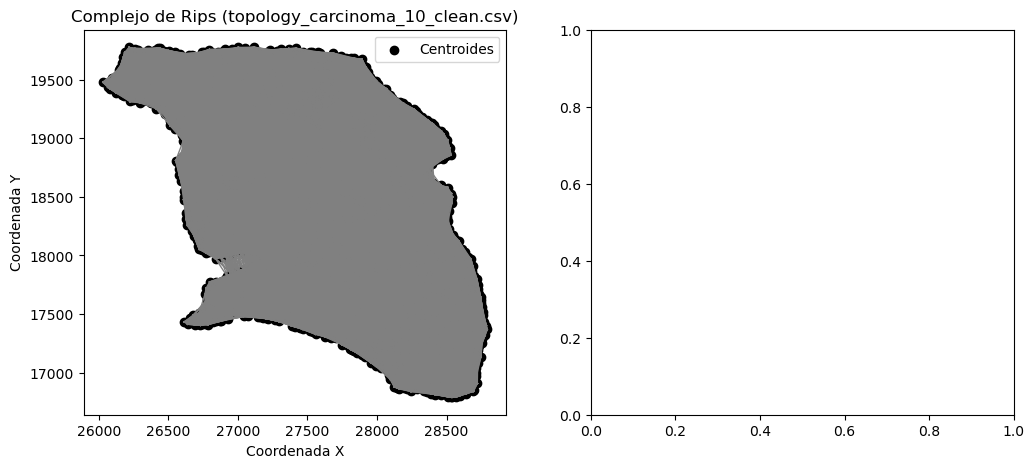

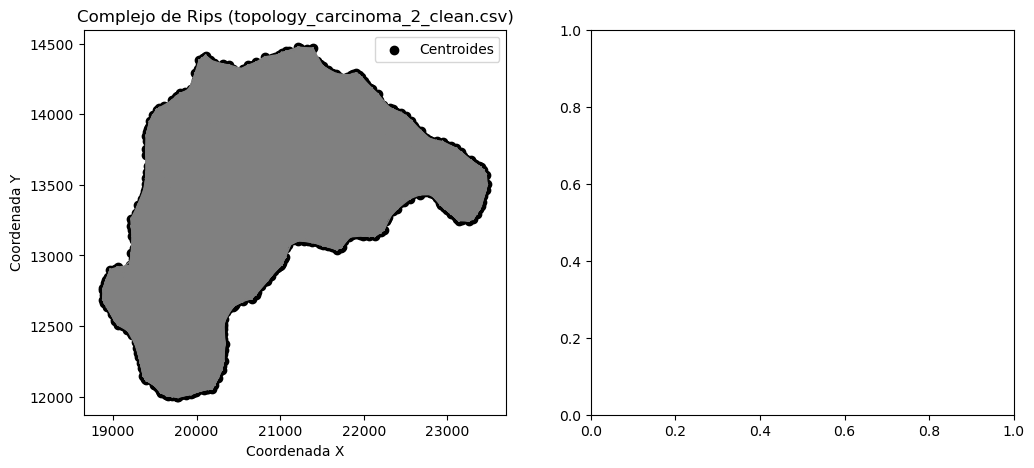

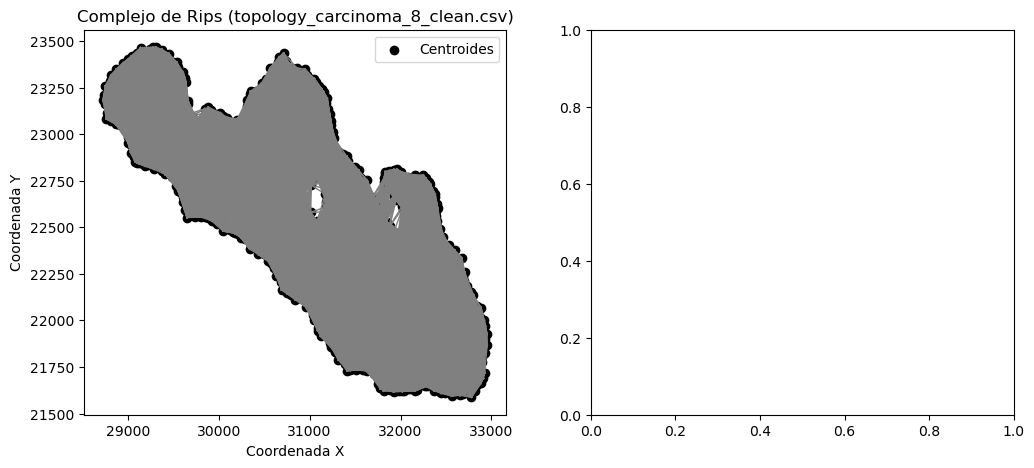

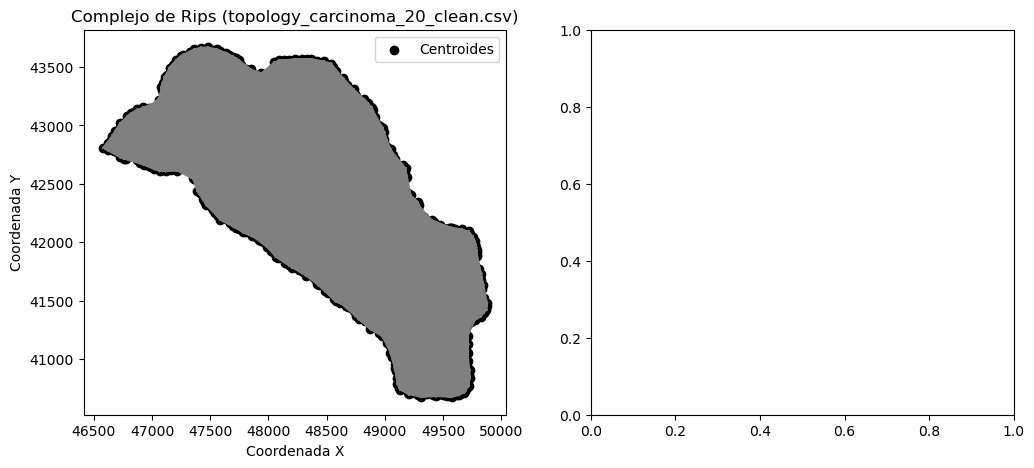

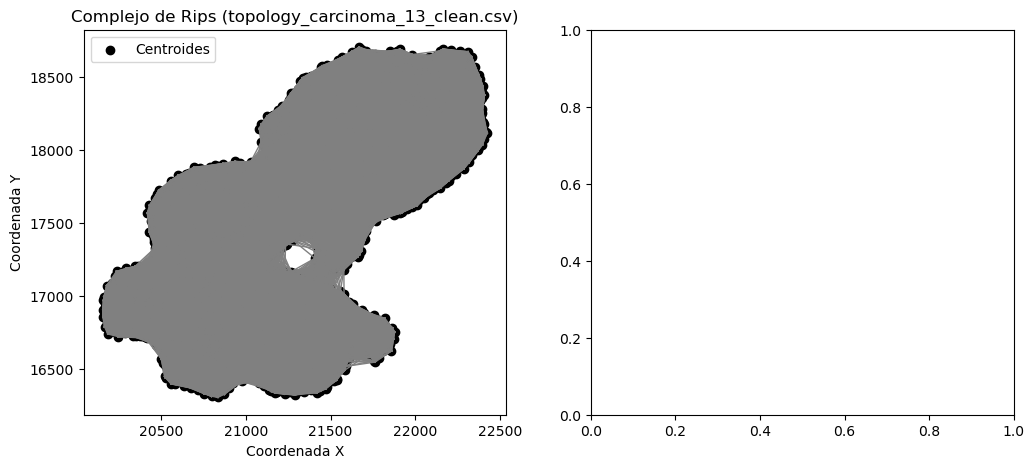

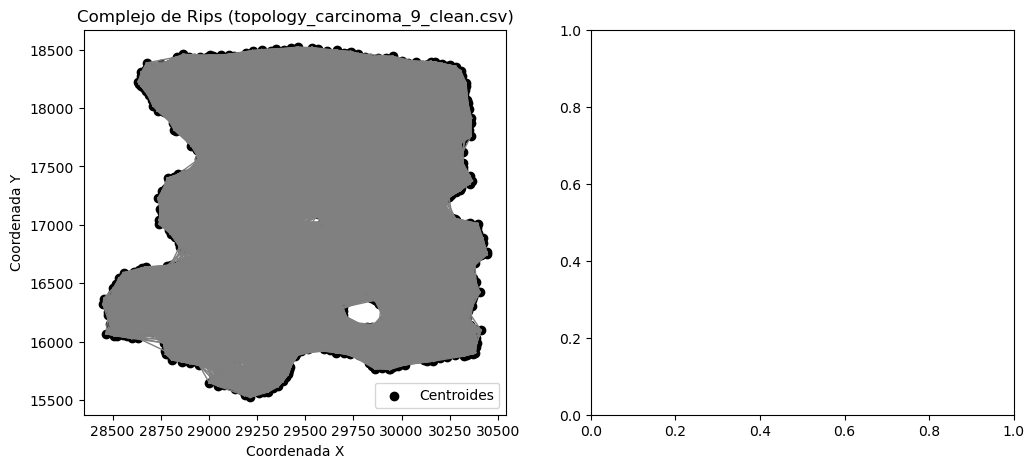

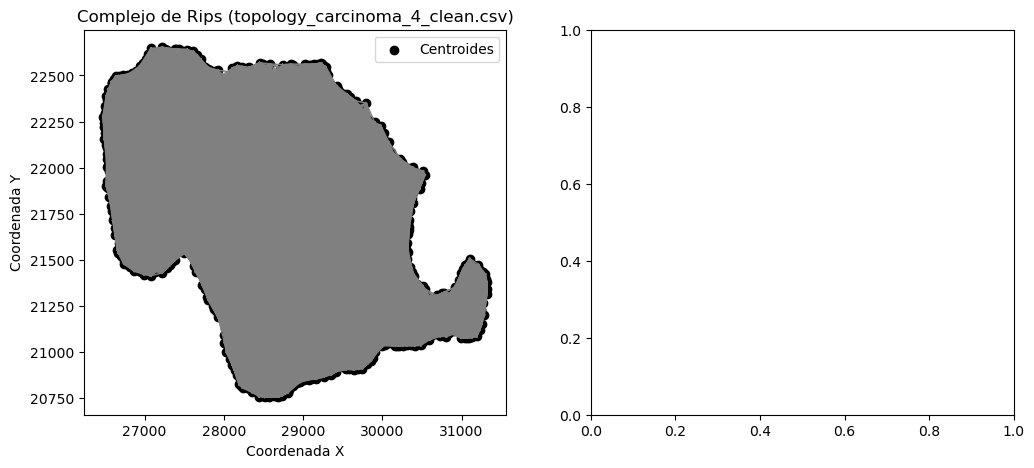

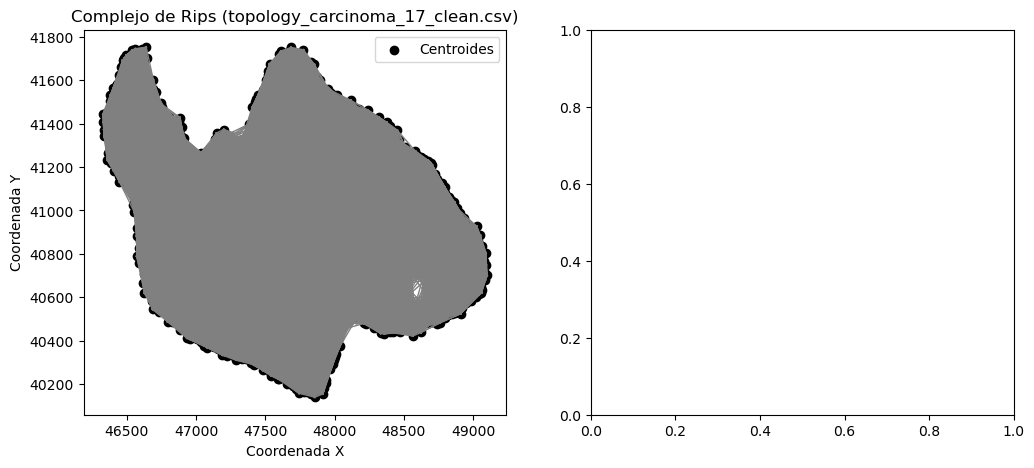

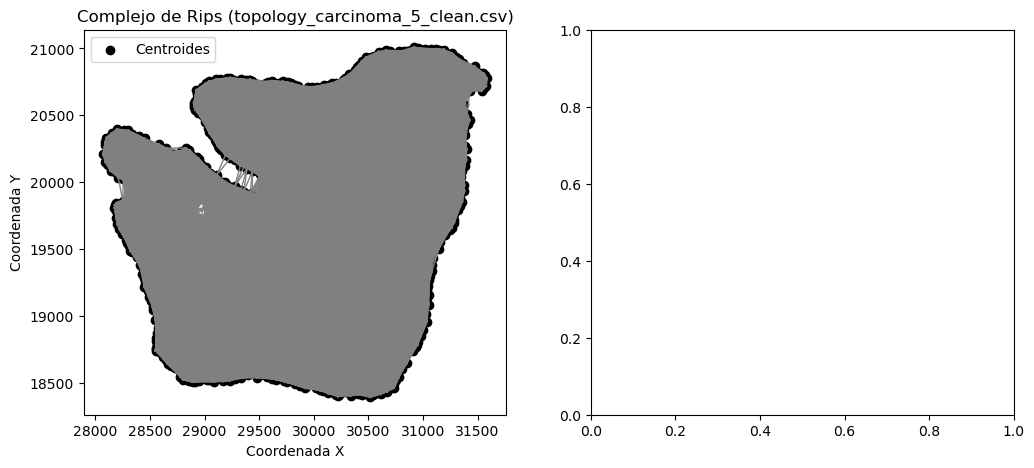

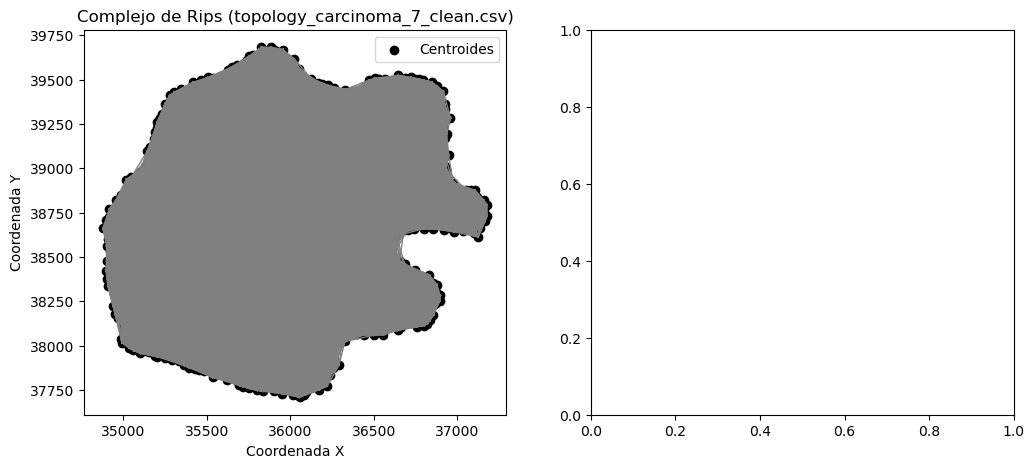

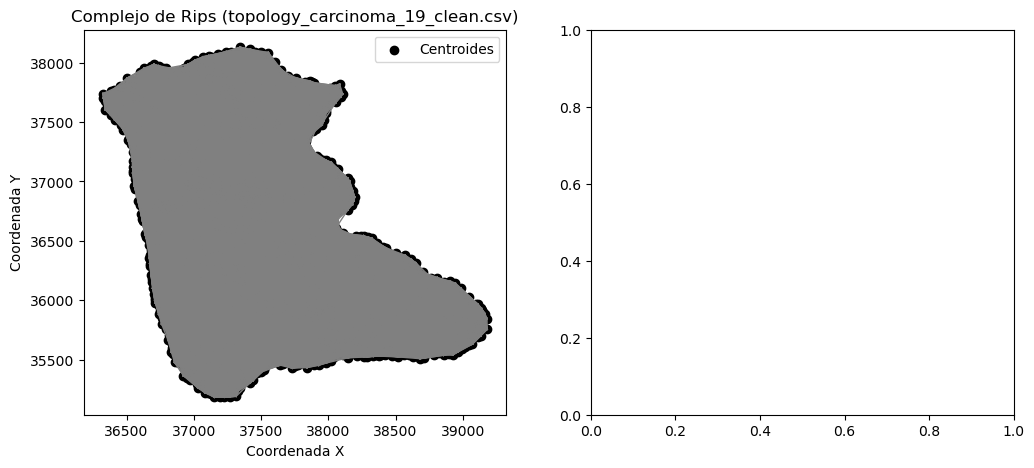

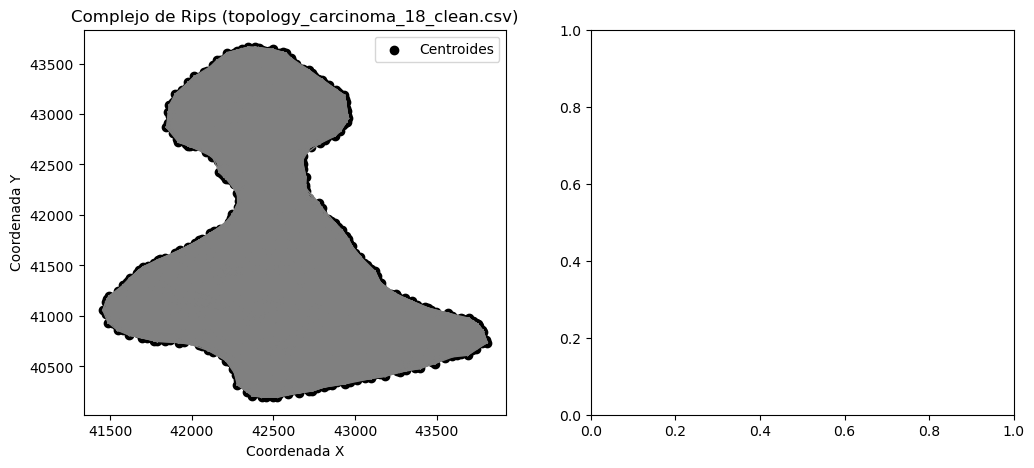

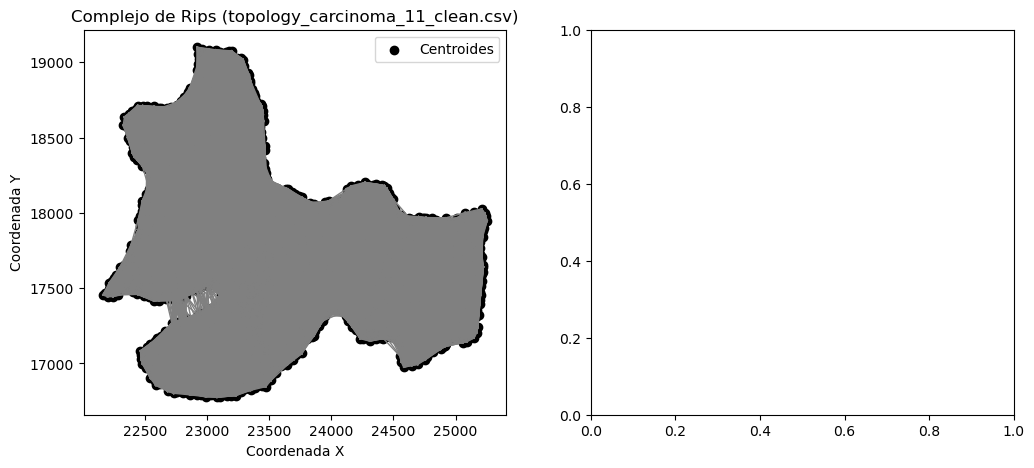

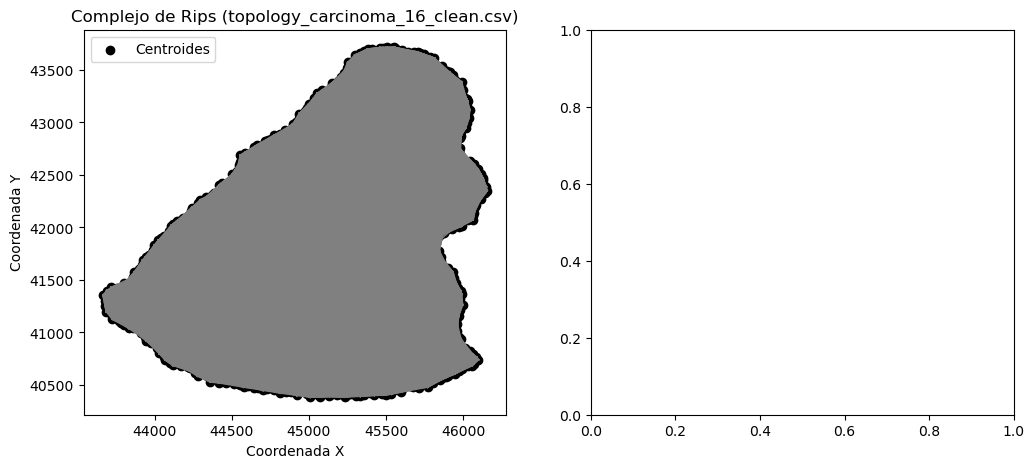

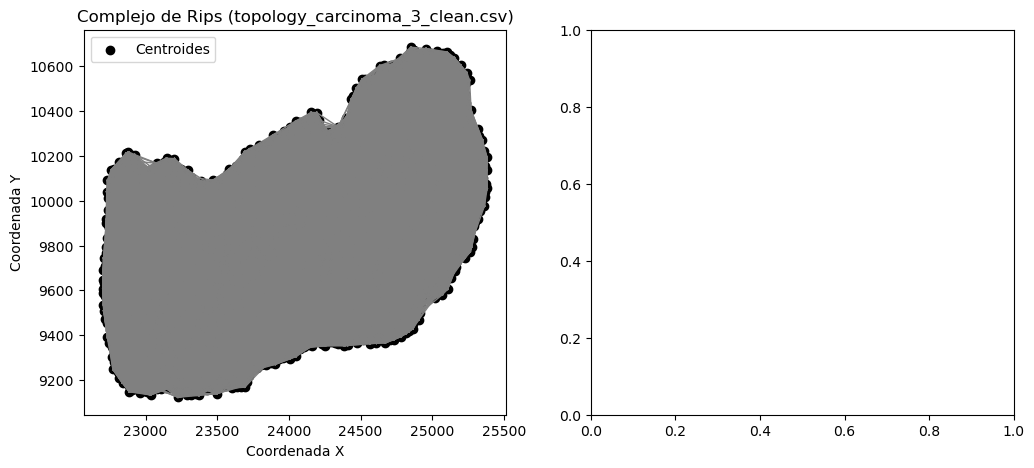

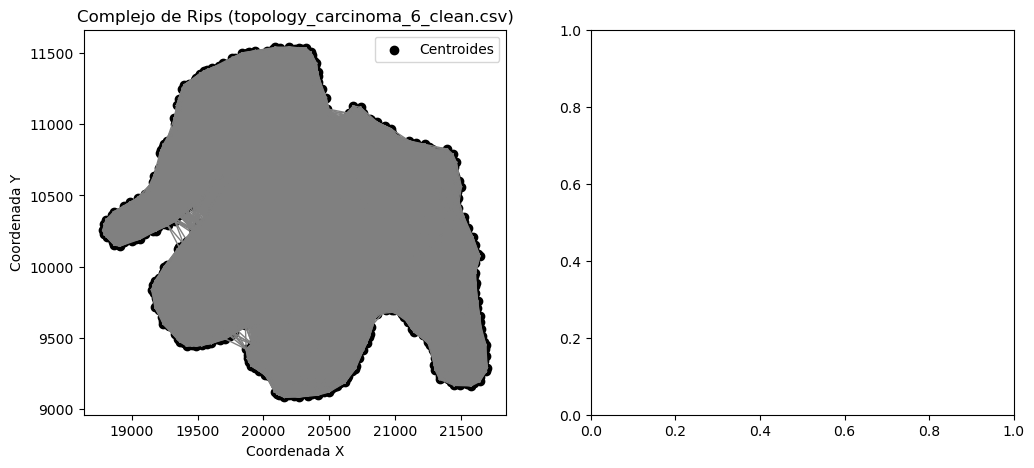

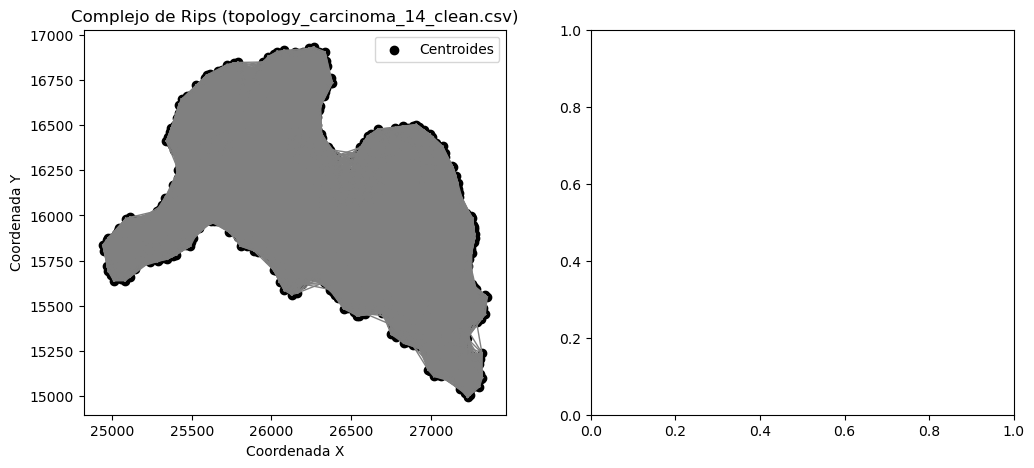

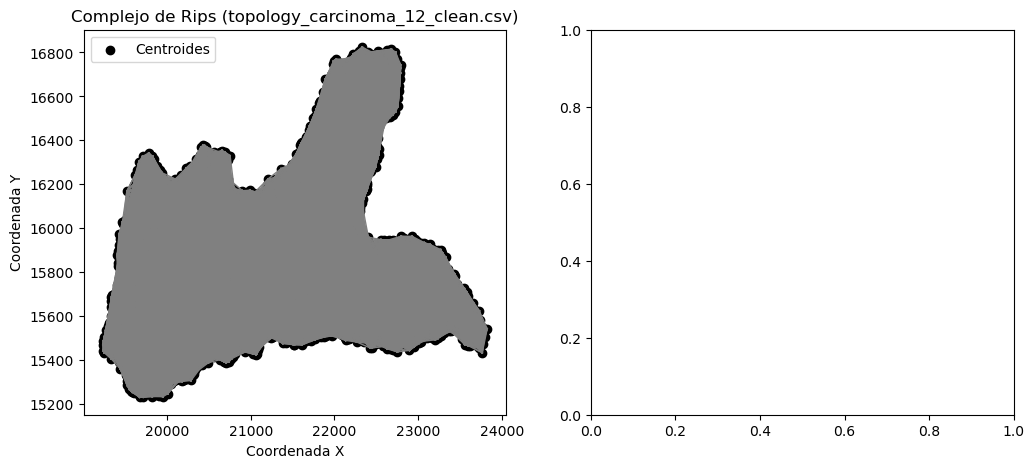

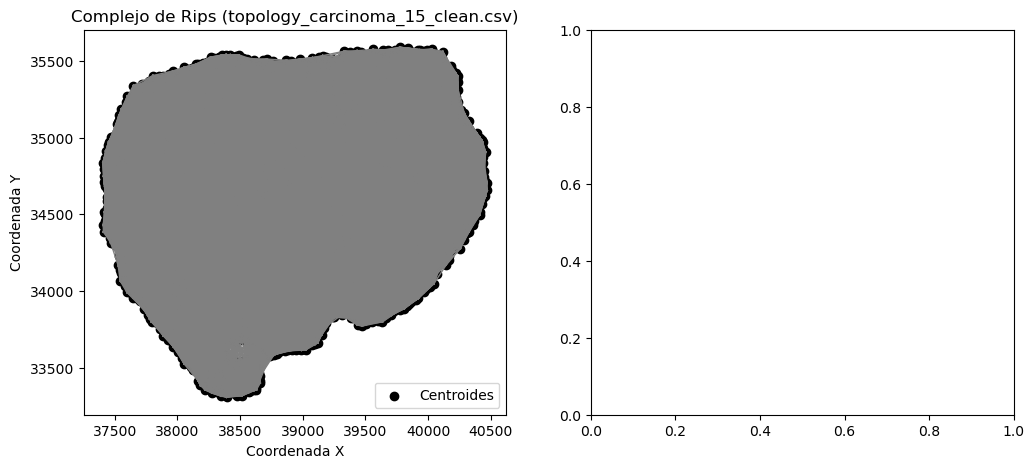

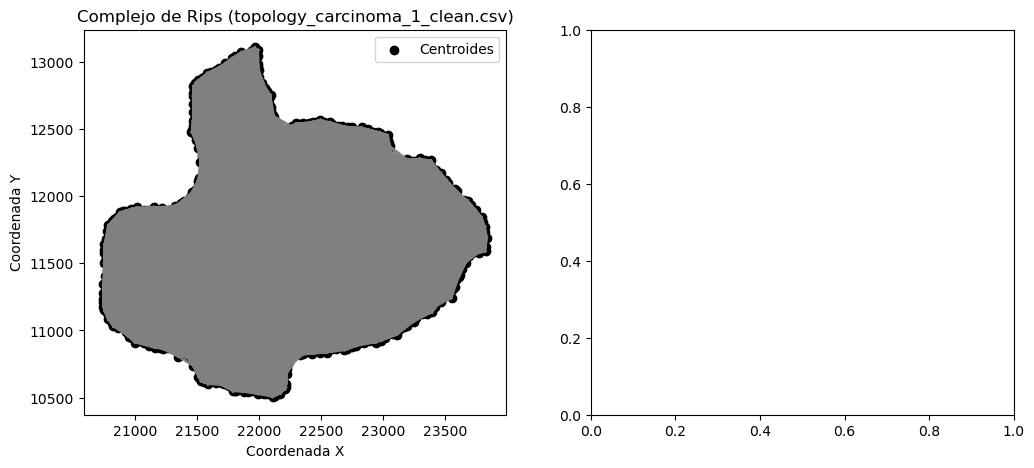

In [42]:
calcular_rips_y_persistencia("/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/")

In [43]:
calcular_distancia_bottleneck('/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/persistencia/')

Distancia de Bottleneck (Dimensión 1) para topology_carcinoma_10_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para topology_carcinoma_10_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para topology_carcinoma_2_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para topology_carcinoma_2_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para topology_carcinoma_8_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para topology_carcinoma_8_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para topology_carcinoma_20_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para topology_carcinoma_20_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para topology_carcinoma_13_clean.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para topology_carcinoma_13_clean.csv es efectivamente cero.
Distancia de Bottleneck 

In [44]:
distancias("/home/jupyter-user5/multicellularity_patterns_classification-/datos_c/carcinoma_invasivo/persistencia/")

Distancias (Dimensión 1) para topology_carcinoma_10_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_carcinoma_10_clean.csv son efectivamente cero.


/opt/conda/envs/TDA/lib/python3.7/site-packages/gudhi/wasserstein/wasserstein.py:209: UserWarning: Cardinality of essential parts differs. Distance (cost) is +inf.
  warnings.warn('Cardinality of essential parts differs. Distance (cost) is +inf.')


Distancias (Dimensión 1) para topology_carcinoma_2_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_carcinoma_2_clean.csv son efectivamente cero.
Distancias (Dimensión 1) para topology_carcinoma_8_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_carcinoma_8_clean.csv son efectivamente cero.
Distancias (Dimensión 1) para topology_carcinoma_20_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_carcinoma_20_clean.csv son efectivamente cero.
Distancias (Dimensión 1) para topology_carcinoma_13_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_carcinoma_13_clean.csv son efectivamente cero.
Distancias (Dimensión 1) para topology_carcinoma_9_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_carcinoma_9_clean.csv son efectivamente cero.
Distancias (Dimensión 1) para topology_carcinoma_4_clean.csv son efectivamente cero.
Distancias (Dimensión 0) para topology_carcinoma_4_clean.csv 